<a href="https://colab.research.google.com/github/joylin0209/40133HW/blob/main/Joylin_hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 4 - Exploring Semantic Spaces (Word Embeddings)
This week, we build on last week's topic modeling techniques by taking a text corpus we have developed, specifying an underlying number of dimensions, and training a model with a neural network auto-encoder (one of Google's word2vec  algorithms) that best describes corpus words in their local linguistic contexts, and exploring their locations in the resulting space to learn about the discursive culture that produced them.

This is our third document representation we have learned: First, we used word counts. Second, we used LDA topic models built around term coocurrence in the same document (i.e., a "bag of words"). Third, documents here are represented as densely indexed locations in dimensions, so that distances between those documents (and words) contain more information, though they require the full vector of dimension loadings (rather than just a few selected topic loadings) to describe. We will explore these spaces to understand complex, semantic relationships between words, index documents with descriptive words, identify the likelihood that a given document would have been produced by a given vector model, and explore how semantic categories can help us understand the cultures that produced them.

Note that most modern natural language processing (NLP) research, at least in computer science, uses word embeddings. This is the foundation of most state-of-the-art models.

Also note that the code in this Notebook can take many minutes or even hours to run. This is the case for most NLP research these days, and it's a good opportunity to start thinking about how to manage high-compute workloads, such as running code on small samples to test it, loading datafiles in [chunks](https://stackoverflow.com/a/25962187), or [multiprocessing](https://en.wikipedia.org/wiki/Multiprocessing).

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!apt-get install fonts-arphic-uming
!pip install -U ckiptagger[tf,gdown]
!pip install -U ckiptagger

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-arphic-uming
0 upgraded, 1 newly installed, 0 to remove and 31 not upgraded.
Need to get 7,933 kB of archives.
After this operation, 21.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-arphic-uming all 0.2.20080216.2-10ubuntu2 [7,933 kB]
Fetched 7,933 kB in 2s (4,393 kB/s)
Selecting previously unselected package fonts-arphic-uming.
(Reading database ... 121730 files and directories currently installed.)
Preparing to unpack .../fonts-arphic-uming_0.2.20080216.2-10ubuntu2_all.deb ...
Unpacking fonts-arphic-uming (0.2.20080216.2-10ubuntu2) ...
Setting up fonts-arphic-uming (0.2.20080216.2-10ubuntu2) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


## <font color="red">*Pitch Your Project*</font>

<font color="red">In the three cells immediately following, describe **WHAT** you are planning to analyze for your final project (i.e., texts, contexts and the social game, world and actors you intend to learn about through your analysis) (<200 words), **WHY** you are going to do it (i.e., why would theory and/or the average person benefit from knowing the results of your investigation) (<200 words), and **HOW** you plan to investigate it (i.e., what are the approaches and operations you plan to perform, in sequence, to yield this insight) (<400 words).

# ***What?***
<200 words

I plan to analyze the phenomenon of misogyny on Taiwanese online forums. In recent years, gender issues in Taiwan have gained increased attention due to the legalization of same-sex marriage, the #MeToo movement, and the introduction of women's representation quotas in elections. Despite progress towards gender equality in legal and societal realms, there is a prevalent trend of misogyny on the internet. Therefore, I aim to delve into the content of this phenomenon as observed on online platforms.


## ***Why?***
<200 words

Exploring the misogyny is motivated by the question of why, in societies that strive for gender equality, such sentiments intensify. Investigating this phenomenon can provide insights into its origins, reflection of societal conditions or macro structures, and potential solutions.

## ***How?***
<400 words

I plan to utilize web scraping to retrieve posts from Taiwan's prominent PTT forum, focusing on the keyword "Tai-Nu台女" (Tai women) for selection. This term has been frequently debated on Taiwanese forums in recent years, as it is often used to collectively categorize women deemed "un-acceptable" based on criteria like materialism, princess behavior, or preferences for foreign men. Some, mostly women, view the term as pejorative, perpetuating patriarchal biases, character judgments, and distinctions of worth. Yet, proponents argue it merely abbreviates "Taiwanese women" without discriminatory connotations. By selecting this contentious keyword, we not only capture posts related to anti-women sentiment but also explore whether these posts carry negative emoaiton. Post-filtering analyses may include tracking the keyword's frequency over time, identifying co-occurring themes, and examining the most commonly used adjectives associated with the keyword.

## <font color="red">*Pitch Your Sample*</font>

<font color="red">In the cell immediately following, describe the rationale behind your proposed sample design for your final project. What is the social game, social work, or social actors you about whom you are seeking to make inferences? What are its virtues with respect to your research questions? What are its limitations? What are alternatives? What would be a reasonable path to "scale up" your sample for further analysis (i.e., high-profile publication) beyond this class? (<300 words).

## ***Which (words)?***
<300 words

The data I chose is from Taiwan Forum PTT. Since its establishment in 1995, PTT has a total number of registered users of more than 1.5 million people. It is an anonymous online forum that distinguishes discussion boards on different topics. People with accounts can freely post articles, reply to articles, or quote another article to order the publication of a new article. Because a large number of people use it and it has a long history, it can fully express the current status of Taiwan's Internet ecology.
The disadvantage is the distribution of age groups. In 2011, Dcard, a forum platform of similar nature, was also opened. In recent years, the platform used by young people (especially college students) is Dcard. Most of the people who continue to use PTT are people who have graduated from college. Therefore, there may be an age gap in the acquisition of data. In addition, the gender of the poster on Dcard can be displayed, but not on PTT, which also results in a lack of analysis.
In fact, Dcard was originally used for the database during the rainy season, but due to the strictness of network security, crawling could not be carried out smoothly, so PTT was chosen.

In [3]:
!pip install -U git+https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

  Cloning https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git to /tmp/pip-req-build-1tyabkr1
  Running command git clone --filter=blob:none --quiet https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git /tmp/pip-req-build-1tyabkr1
  Resolved https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git to commit b17a265d3b8253424e5b38872457f7437909a65d
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.8/76.8 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [4]:
#All these packages need to be installed from pip
import gensim#For word2vec, etc
import requests #For downloading our datasets
import lucem_illud #pip install -U git+https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

import numpy as np #For arrays
import pandas as pd #Gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
import sklearn.metrics.pairwise #For cosine similarity
import sklearn.manifold #For T-SNE
import sklearn.decomposition #For PCA

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

import os #For looking through files
import os.path #For managing file paths

# Getting our corpora

Instead of downloading our corpora, we have download them in advance; a subset of the [senate press releases](https://github.com/lintool/GrimmerSenatePressReleases) are in `grimmerPressReleases`. We will load them into a DataFrame, but first we need to define a function to convert directories of text files into DataFrames:

In [5]:
def loadDir(targetDir, category):
    allFileNames = os.listdir(targetDir)
    #We need to make them into usable paths and filter out hidden files
    filePaths = [os.path.join(targetDir, fname) for fname in allFileNames if fname[0] != '.']

    #The dict that will become the DataFrame
    senDict = {
        'category' : [category] * len(filePaths),
        'filePath' : [],
        'text' : [],
    }

    for fPath in filePaths:
        with open(fPath) as f:
# Try this line instead if you get an encoding error.
#         with open(fPath, encoding="ISO-8859-1") as f:
            senDict['text'].append(f.read())
            senDict['filePath'].append(fPath)

    return pd.DataFrame(senDict)

In [6]:
# Here I mount google drive. I stored all the data in the drive so I can extract data file directly from there. If you don't want to use the drive,
# you can always upload the data to /content/ directly.
# We recommend drive for the larger datasets.

from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/TA_file_2024_CCA')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/TA_file_2024_CCA'

Now we can use the function in all the directories in `data/grimmerPressReleases`. If you are on Google Colab, note that rather than downloading GitHub data to your local machine and then uploading it to Drive, you can more quickly `git clone` directly to Colab, such as `!git clone https://github.com/lintool/GrimmerSenatePressReleases.git /drive/MyDrive/`, which then makes your `dataDir = 'drive/MyDrive/grimmerPressReleases/raw'`.

In [6]:
#dataDir = 'content/drive/MyDrive/grimmerPressReleases/raw'
dataDir = '/content/drive/MyDrive/SOCI40133/data/grimmerPressReleases'

senReleasesDF = pd.DataFrame()

for senatorName in [d for d in os.listdir(dataDir) if d[0] != '.']:
    senPath = os.path.join(dataDir, senatorName)
    senReleasesDF = senReleasesDF.append(loadDir(senPath, senatorName), ignore_index = True)

senReleasesDF[:100:10]

,category,filePath,text
0,Kohl,/content/drive/MyDrive/SOCI40133/data/grimmerP...,KOHL SECURES 800 000 TO HELP WAUKESHA COMPLY ...
10,Kohl,/content/drive/MyDrive/SOCI40133/data/grimmerP...,DEWINE KOHL CONTINUE EFFORTS TO REDUCE GAS P...
20,Kohl,/content/drive/MyDrive/SOCI40133/data/grimmerP...,KOHL SPONSORS BILL TARGETING RAILROAD PRICE G...
30,Kohl,/content/drive/MyDrive/SOCI40133/data/grimmerP...,KOHL FDA CHIEF AGREE TO FOOD SAFETY HEARING I...
40,Kohl,/content/drive/MyDrive/SOCI40133/data/grimmerP...,Statement of U S Senator Herb Kohl on the Imm...
50,Kohl,/content/drive/MyDrive/SOCI40133/data/grimmerP...,KOHL INCREASES FUNDING FOR FOOD SAFETY INSPECT...
60,Kohl,/content/drive/MyDrive/SOCI40133/data/grimmerP...,Statement of U S Senator Herb Kohl on the Imm...
70,Kohl,/content/drive/MyDrive/SOCI40133/data/grimmerP...,KOHL CALLS ON JUSTICE DEPARTMENT TO INCREASE E...
80,Kohl,/content/drive/MyDrive/SOCI40133/data/grimmerP...,KOHL SECURES 250 000 FOR VICTIMS ASSISTANCE I...
90,Kohl,/content/drive/MyDrive/SOCI40133/data/grimmerP...,KOHL LEADS EFFORT TO RESTORE 1 BILLION IN CRI...


Word2Vec needs to retain the sentence structure so as to capture a "continuous bag of words (CBOW)" and all of the skip-grams within a word window. The algorithm tries to preserve the distances induced by one of these two local structures. This is very different from clustering and LDA topic modeling which extract unordered words alone.

When we normalize here, we don't use the lematized form of the word because we might lose information. Note the paramter in the normalize tokens function.

In [8]:
#Apply our functions, notice each row is a list of lists now
from tqdm import tqdm
tqdm.pandas()

senReleasesDF['tokenized_sents'] = senReleasesDF['text'].progress_apply(lambda x: [lucem_illud.word_tokenize(s) for s in lucem_illud.sent_tokenize(x)])
senReleasesDF['normalized_sents'] = senReleasesDF['tokenized_sents'].apply(lambda x: [lucem_illud.normalizeTokens(s, lemma=False) for s in x])
# With the latest spacy versions, you may get warnings with the following line of code. See the discussion here: https://github.com/allenai/allennlp/issues/5036
# senReleasesDF['normalized_sents'] = senReleasesDF['tokenized_sents'].apply(lambda x: [lucem_illud.normalizeTokens(s) for s in x])

senReleasesDF[:100:10]

  0%|          | 0/3914 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
 75%|███████▌  | 2952/3914 [11:21<03:42,  4.33it/s]


KeyboardInterrupt: 

# Word2Vec

We will be using the gensim implementation of [Word2Vec](https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec). Note that newer versions of gensim have different syntax, but if you're using a newer version, you should see informative error messages (e.g., replace `senReleasesW2V['president'][:10]` with `senReleasesW2V['president'].wv[:10]`). The following lines should work out-of-the-box on Google Colab.

To load our data our data we give all the sentences to the trainer:

In [150]:
# The sg=0 argument indicates that we don't want to use "skipgram" but instead "CBOW"
senReleasesW2V = gensim.models.word2vec.Word2Vec(senReleasesDF['normalized_sents'].sum(), sg=0)

NameError: name 'senReleasesDF' is not defined

Inside the word2vec object, each word has a vector. To access the vector directly, use the square braces (`__getitem__`) method:

In [ ]:
senReleasesW2V.wv['president'][:10] #Shortening because it's very large

If you want the full matrix, `syn0` stores all the vectors:

In [ ]:
senReleasesW2V.wv.vectors

Then, `index2word` lets you translate from the matrix to words:

In [ ]:
senReleasesW2V.wv.index_to_key[10]

Now we can look at a few things that come from the word vectors. The first is to find similar vectors (cosine similarity):

In [ ]:
senReleasesW2V.wv.most_similar('president')

In [ ]:
senReleasesW2V.wv.most_similar('war')

Find which word least matches the others within a word set (cosine similarity):

In [ ]:
senReleasesW2V.wv.doesnt_match(['administration', 'administrations', 'presidents', 'president', 'washington'])

Find which word best matches the result of a semantic *equation* (here, we seek the words whose vectors best fit the missing entry from the equation: **X + Y - Z = _**.

In [ ]:
senReleasesW2V.wv.most_similar(positive=['clinton', 'republican'], negative = ['democrat'])

Here we see that **Clinton + Republican - Democrat = Bush**. In other words, in this dataset, **Clinton** is to **Democrat** as **Bush** is to **Republican**. Whoah!

We can also save the vectors for later use:

In [ ]:
senReleasesW2V.save("senpressreleasesWORD2Vec")

We can also use dimension reduction to visulize the vectors. We will start by selecting a subset we want to plot. Let's look at the top words from the set:

In [ ]:
numWords = 50
targetWords = senReleasesW2V.wv.index_to_key[:numWords]

We can then extract their vectors and create our own smaller matrix that preserved the distances from the original:

In [ ]:
wordsSubMatrix = []
for word in targetWords:
    wordsSubMatrix.append(senReleasesW2V.wv[word])
wordsSubMatrix = np.array(wordsSubMatrix)
wordsSubMatrix

Then we can use PCA to reduce the dimesions (e.g., to 50), and T-SNE to project them down to the two we will visualize. We note that this is nondeterministic process, and so you can repeat and achieve alternative projectsions/visualizations of the words:

In [ ]:
pcaWords = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_data = pcaWords.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWords = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_data)

We now can plot the points

In [ ]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha = 0)#Making the points invisible
for i, word in enumerate(targetWords):
    ax.annotate(word, (tsneWords[:, 0][i],tsneWords[:, 1][i]), size =  20 * (numWords - i) / numWords)
plt.xticks(())
plt.yticks(())
plt.show()

My visualization above puts ``said`` next to ``congress`` and ``bill`` near ``act``. ``health`` is beside ``care`` and ``national`` abuts ``security``.

## Adding more context - FastText

Since the original word2vec paper, there have followed a slew of word embedding related methods which innovate and build on them in many ways. One popular extension is FastText ([Bojanowski et al. 2017](https://arxiv.org/abs/1607.04606)), which uses sub-words to generate its vectors. Using subwords means that it is powerful in dealing with unknown words and sparse languages that otherwise have a rich morphological structure. These sub-words are incorporated into the previously skipgram and CBOW methods. For example, if the word is “which”, it is represented as the word itself along with a bag of constituent n-grams. If n=3, the representation looks like <wh, whi, hic, ich, ch>, and we learn a representation for each of these constituents, with the word “which” taking on the average value of these constituents.

FastText can be used either via Gensim or the official package, and primarily has two functions - word representations, and text classification (Joulin et al. 2017). See below for code using the FastText package for playing with word representations, taken from their word representations tutorial (https://fasttext.cc/docs/en/unsupervised-tutorial.html).


In [ ]:
! pip install fasttext

### Representations with FastText

We will follow the instructions in the FastText tutorial to prepare our data, (Wikipedia). You can either follow the instructions on the page for setting the data, or download/copy it to drive it from this [Google Drive link](https://drive.google.com/file/d/12T3nNzf0a7tdhm1lVyfz9Ix9XVITFMCP/view?usp=sharing).

In this example, we will be training a model - it is also possible to download and use the many pre-trained models.

In [ ]:
import fasttext

In [ ]:
# Replace with the path for where you have placed the 'fil9' file.
file_address = "/content/drive/MyDrive/SOCI40133/fil9"

In [ ]:
model = fasttext.train_unsupervised(file_address, minCount=200, epoch=1)

While FastText is running, the progress and estimated time to completion is shown on your screen. Once the training finishes, the model variable contains information on the trained model, which you can use for querying:



In [ ]:
model.words

It returns all words in the vocabulary, sorted by decreasing frequency. We can get the word vector by:



In [ ]:
model.get_word_vector("the")

In [ ]:
model.save_model("fil9.bin")

In [ ]:
# when we want to use the model again
model = fasttext.load_model("fil9.bin")

Let's now print some vectors.

In [ ]:
[model.get_word_vector(x) for x in ["asparagus", "pidgey", "yellow"]]

A nice feature is that you can also query for words that did not appear in your data! Indeed words are represented by the sum of their substrings. As long as the unknown word is made of known substrings, there is a representation of it!

As an example let's try with a misspelled word:



In [ ]:
model.get_word_vector("enviroment")

In [ ]:
# Add FastText here

## <font color="red">*Exercise 1*</font>

<font color="red">Construct cells immediately below this that embed documents related to your final project using at least two different specification of `word2vec` and/or `fasttext`, and visualize them each with two separate visualization layout specifications (e.g., TSNE, PCA). Then interrogate critical word vectors within your corpus in terms of the most similar words, analogies, and other additions and subtractions that reveal the structure of similarity and difference within your semantic space. What does this pattern reveal about the semantic organization of words in your corpora? Which estimation and visualization specification generate the most insight and appear the most robustly supported and why?

<font color="red">***Stretch***: Explore different vector calculations beyond addition and subtraction, such as multiplication, division or some other function. What does this exploration reveal about the semantic structure of your corpus?

In [104]:
import os
import pandas as pd

def loadDir(targetDir, category):
    allFileNames = os.listdir(targetDir)
    filePaths = [os.path.join(targetDir, fname) for fname in allFileNames if fname[0] != '.']

    senDict = {
        'category': [category] * len(filePaths),
        'filePath': [],
        'text': [],
    }

    for fPath in filePaths:
        with open(fPath, encoding="utf-8") as f:
            senDict['text'].append(f.read())
            senDict['filePath'].append(fPath)

    return pd.DataFrame(senDict)

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Set the working directory
os.chdir('/content/drive/MyDrive/SOCI40133')  # Update to your specific path

# Update dataDir to the correct directory or file path
dataDir = '/content/drive/MyDrive/SOCI40133/PTTdata2.csv'

# Load data directly from CSV if it's a CSV file
pttDF = pd.read_csv(dataDir)

# Uncomment the following lines if it's a directory containing multiple files
# pttDF = pd.DataFrame()
# for senatorName in [d for d in os.listdir(dataDir) if d[0] != '.']:
#     senPath = os.path.join(dataDir, senatorName)
#     pttDF = pttDF.append(loadDir(senPath, senatorName), ignore_index=True)


print(pttDF[:100:10])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                          作者         看板                       標題       日期  類型  \
0            callhek (沒錢住帝寶)     C_Chat   [閒聊] 為什麼不能叫台女少買包包跟化妝品？  2023-10  閒聊   
10             aaaa8129 (阿睿)     C_Chat      Re: [閒聊] 小S是一代台女代表嗎  2023-06  閒聊   
20           callhek (沒錢住帝寶)     C_Chat   [閒聊] 為什麼不能叫台女少買包包跟化妝品？  2023-10  閒聊   
30             aaaa8129 (阿睿)     C_Chat      Re: [閒聊] 小S是一代台女代表嗎  2023-06  閒聊   
40           callhek (沒錢住帝寶)     C_Chat   [閒聊] 為什麼不能叫台女少買包包跟化妝品？  2023-10  閒聊   
50             aaaa8129 (阿睿)     C_Chat      Re: [閒聊] 小S是一代台女代表嗎  2023-06  閒聊   
60           callhek (沒錢住帝寶)     C_Chat   [閒聊] 為什麼不能叫台女少買包包跟化妝品？  2023-10  閒聊   
70             aaaa8129 (阿睿)     C_Chat      Re: [閒聊] 小S是一代台女代表嗎  2023-06  閒聊   
80        chubby31190 (優文專家)  Gossiping   Re: [問卦] 日女跟台女的養成有什麼不同  2024-01  問卦   
90  deathcustom (Full House)  Gossiping  Re: [問卦] 被境管5年和台女假婚有

In [105]:
# change the column name
pttDF = pttDF.rename(columns={'作者': 'user', '看板': 'board', '標題': 'title', '日期': 'date', '類型': 'type', '內文': 'text'})

# print the new DF
print(pttDF[:100:10])


                        user      board                    title     date  \
0            callhek (沒錢住帝寶)     C_Chat   [閒聊] 為什麼不能叫台女少買包包跟化妝品？  2023-10   
10             aaaa8129 (阿睿)     C_Chat      Re: [閒聊] 小S是一代台女代表嗎  2023-06   
20           callhek (沒錢住帝寶)     C_Chat   [閒聊] 為什麼不能叫台女少買包包跟化妝品？  2023-10   
30             aaaa8129 (阿睿)     C_Chat      Re: [閒聊] 小S是一代台女代表嗎  2023-06   
40           callhek (沒錢住帝寶)     C_Chat   [閒聊] 為什麼不能叫台女少買包包跟化妝品？  2023-10   
50             aaaa8129 (阿睿)     C_Chat      Re: [閒聊] 小S是一代台女代表嗎  2023-06   
60           callhek (沒錢住帝寶)     C_Chat   [閒聊] 為什麼不能叫台女少買包包跟化妝品？  2023-10   
70             aaaa8129 (阿睿)     C_Chat      Re: [閒聊] 小S是一代台女代表嗎  2023-06   
80        chubby31190 (優文專家)  Gossiping   Re: [問卦] 日女跟台女的養成有什麼不同  2024-01   
90  deathcustom (Full House)  Gossiping  Re: [問卦] 被境管5年和台女假婚有效嗎?  2024-01   

   type                                               text  
0    閒聊  洽民好啊！\n\n那個退掉你的公仔叫你去買小孩用品的爛廣告阿，看起來就是要仇視我們宅宅！\n...  
10   閒聊  \n\n\n先說，我是來逆風的，\n\n\

Since my data is in Chinese, the data is still not neat enough after tokenization and normalization in English, so I added a package suitable for Chinese.

In [106]:
import pandas as pd
import re

#remove url in text

def remove_urls_from_text(text):

    url_pattern = re.compile(r'https?://\S+|www\.\S+')


    text_without_urls = re.sub(url_pattern, '', text)

    return text_without_urls

pttDF['text'] = pttDF['text'].apply(remove_urls_from_text)

print(pttDF)

                                  user        board  \
0                      callhek (沒錢住帝寶)       C_Chat   
1                         Daihao (TDH)       C_Chat   
2               alucard6310 (人生只為漫畫而活)       C_Chat   
3                        moocow (void)       C_Chat   
4                sakurammsrx (+9肥宅算盤子)       C_Chat   
...                                ...          ...   
2641                      david7928 ()  Marginalman   
2642                          Atima ()  Marginalman   
2643  DJYOSHITAKA (franchouchouISBEST)  Marginalman   
2644                diefish5566 (還我姆咪)  Marginalman   
2645                  NTUEE2CS (電機轉資工)  Marginalman   

                             title     date type  \
0           [閒聊] 為什麼不能叫台女少買包包跟化妝品？  2023-10   閒聊   
1                   [我推] 美彌子算是台女嗎？  2023-07   我推   
2              [閒聊] 台女V挑戰500元過一個禮拜  2023-07   閒聊   
3              Re: [閒聊] 小S是一代台女代表嗎  2023-06   閒聊   
4              Re: [閒聊] 小S是一代台女代表嗎  2023-06   閒聊   
...                        

If I use tqdm to do token function, the chinnese sentences cannot succefully be seperates into different words, so I use other package.

The Academia Sinica in Taiwan has developed a convenient package called [CKIP](https://github.com/ckiplab/ckiptagger), which has a very high accuracy (97%) in traditional Chinese word segmentation.


In [107]:
#Using CKIP
from ckiptagger import data_utils, construct_dictionary, WS, POS, NER
#data_utils.download_data_gdown("/content/drive/MyDrive/SOCI40133/CKIP.zip")

ws = WS("/content/drive/MyDrive/SOCI40133/data")


text_list = pttDF['text'].tolist()
print(text_list[:5])


word_sentence_list = ws(text_list)



pttDF['ckip_tokenized'] = word_sentence_list


print(pttDF[['text', 'ckip_tokenized']][:5])

/usr/local/lib/python3.10/dist-packages/ckiptagger/model_ws.py:106: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_d, name=name)


['洽民好啊！\n\n那個退掉你的公仔叫你去買小孩用品的爛廣告阿，看起來就是要仇視我們宅宅！\n\n公仔玩具和電動，明明可以用來跟小孩同樂，我還能跟小孩一起玩超級瑪莉歐賽車，更能\n招待親戚小孩一同娛樂。\n\n台女的包包能幹嘛？\n\n數萬元，就他出門可以炫燿一下，能對小孩有幫助嗎？可以增加小孩的人際互動關係嗎？\n\n有沒有西洽？\n\n', '\n美彌子年輕時做八大起家的，中間整形、隆乳，一開始的願望是釣小鮮肉結婚\n\n我去，這聽上去怎麼像是台女\n\n差別在於美彌子後面母性被激發了開始當媽媽了，算是強化版台女？\n\n', '原影片：\n\n\n她就是那位虧200萬的擦邊台V\n現在不搞擦邊，反而是很？？？\n\n先不說500元但是口袋拿出來只有450\n也不說貓食好不好吃...\n\n你拍這個跟Vtuber...形象不太對吧？\n還是其實也可以\n\n只是這感覺像Youtuber諧咖類型、挑戰類型的才拍的吧...\n\n不過挺有才的，這企劃= =\n\n話說450過一個禮拜還有剩，算...很厲害嗎？\n\n感覺挺正常的不是？\n\n', '亂入一下\n\n最近剛破完Mass Effect 三部曲\n\n我覺得第二代的jack那個臉的叛逆樣貌 那個舉手投足\n\n讓我想起小S\n\n電視影集改編應該要找小S去演   ~_~\n\n況且原本jack腳色在遊戲中被Cerberus這組織關起來訓練的時候\n\n也有被打藥 剛好符合時事\n\n至於船上的船醫dr.chakwas則讓我想起日本女演員 余貴美子\n\n因為遊戲中的腳色配音有種奇怪的腔調 = =\n\n', '\n說真的我覺得這個社會應該放下那些對沒有另一半，沒結婚，不生小孩的人的歧視了\n\n自己一個人可以過很好的話，就算40幾也沒差ㄅ\n\n魔物獵友有個4X的，沒另一半，住家裡，在當保全我看他也過的很開心ㄚ\n\n上班都在打魔物\n\n不管男女，不需要給什麼年齡到了就要有另一半還是結婚生子的壓力ㄅ\n\n']
                                                text  \
0  洽民好啊！\n\n那個退掉你的公仔叫你去買小孩用品的爛廣告阿，看起來就是要仇視我們宅宅！\n...   
1  \n美彌子年輕時做八大起家的，中間整形、隆乳，一開始的願望是釣小

jieba is what chatGPT suggest

In [108]:
#using jieba
import jieba
import re

# Define a custom tokenizer function
def tokenize_chinese(text):
    tokens = jieba.cut(text)

    # Remove punctuation and digits
    tokens = [token for token in tokens if re.match(r'^[\u4e00-\u9fa5]+$', token)]

    return tokens

# Apply the custom tokenizer to your DataFrame
pttDF['chinese_tokenized'] = pttDF['text'].apply(tokenize_chinese)

# Display the results
print(pttDF[['text', 'chinese_tokenized']][:5])


Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.884 seconds.
DEBUG:jieba:Loading model cost 0.884 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


                                                text  \
0  洽民好啊！\n\n那個退掉你的公仔叫你去買小孩用品的爛廣告阿，看起來就是要仇視我們宅宅！\n...   
1  \n美彌子年輕時做八大起家的，中間整形、隆乳，一開始的願望是釣小鮮肉結婚\n\n我去，這聽上...   
2  原影片：\n\n\n她就是那位虧200萬的擦邊台V\n現在不搞擦邊，反而是很？？？\n\n先...   
3  亂入一下\n\n最近剛破完Mass Effect 三部曲\n\n我覺得第二代的jack那個臉...   
4  \n說真的我覺得這個社會應該放下那些對沒有另一半，沒結婚，不生小孩的人的歧視了\n\n自己一...   

                                   chinese_tokenized  
0  [洽民好, 啊, 那個, 退掉, 你, 的, 公仔, 叫, 你, 去, 買, 小孩, 用品,...  
1  [美彌子, 年, 輕時, 做, 八大, 起家, 的, 中間, 整形, 隆乳, 一開始, 的,...  
2  [原, 影片, 她, 就是, 那位, 虧, 萬, 的, 擦, 邊台, 現在, 不, 搞, 擦...  
3  [亂入, 一下, 最近, 剛破, 完, 三部曲, 我覺, 得, 第二代, 的, 那個, 臉,...  
4  [說, 真的, 我覺, 得, 這個, 社會, 應該, 放下, 那些, 對, 沒, 有, 另一...  


In [109]:
import jieba
import re

chinese_stopwords = set(['的', '了', '和', '是', '就', '都', '而', '及', '與', '著', '或', '時', '啊'])

def tokenize_chinese(text):
    return jieba.lcut(text)

def chinese_normalize(text):
    tokens = jieba.lcut(text)


    tokens = [token for token in tokens if not re.match(r'^[\W\d]+$', token)]


    tokens = [token.lower() for token in tokens]


    tokens = [token for token in tokens if token not in chinese_stopwords]


    return ' '.join(tokens)



pttDF['chinese_normalize'] = pttDF['text'].apply(chinese_normalize)

# 顯示結果
print(pttDF[:15])



                      user   board                    title     date type  \
0          callhek (沒錢住帝寶)  C_Chat   [閒聊] 為什麼不能叫台女少買包包跟化妝品？  2023-10   閒聊   
1             Daihao (TDH)  C_Chat           [我推] 美彌子算是台女嗎？  2023-07   我推   
2   alucard6310 (人生只為漫畫而活)  C_Chat      [閒聊] 台女V挑戰500元過一個禮拜  2023-07   閒聊   
3            moocow (void)  C_Chat      Re: [閒聊] 小S是一代台女代表嗎  2023-06   閒聊   
4    sakurammsrx (+9肥宅算盤子)  C_Chat      Re: [閒聊] 小S是一代台女代表嗎  2023-06   閒聊   
5    arsl400 (dark hatter)  C_Chat      Re: [閒聊] 小S是一代台女代表嗎  2023-06   閒聊   
6     oion13272613 (虛虛打八八)  C_Chat      Re: [閒聊] 小S是一代台女代表嗎  2023-06   閒聊   
7        krousxchen (城府很深)  C_Chat      Re: [閒聊] 小S是一代台女代表嗎  2023-06   閒聊   
8         wahaha99 (此方不可長)  C_Chat      Re: [閒聊] 小S是一代台女代表嗎  2023-06   閒聊   
9           s7503228 (情報屋)  C_Chat      Re: [閒聊] 小S是一代台女代表嗎  2023-06   閒聊   
10           aaaa8129 (阿睿)  C_Chat      Re: [閒聊] 小S是一代台女代表嗎  2023-06   閒聊   
11      a235477919 (牛逼張學友)  C_Chat      Re: [閒聊] 小S是一代台女代表嗎  2023-06   閒聊   

In [110]:
from gensim.models import Word2Vec

#If I use chinese_normalized_sents with Word2vec, each Chinese word will be cut into a meaningless character.
#Therefore I use ckip_tokenized and chinese_tokenized as the vocabulary library of Word2vec


1. Using  ckip_tokenized

In [111]:
pttDFW2V = Word2Vec(pttDF['ckip_tokenized'], sg=0)

In [112]:
vocab_list = pttDFW2V.wv.index_to_key
print('詞彙列表:', vocab_list)

詞彙列表: ['\n\n', '的', '，', '是', '不', '有', '台女', ' ', '就', '?', '都', '很', '在', '「', '」', '歲', '了', '沒', '也', '被', '一', '你', '未', '\n', '會', '成年', '還', '覺得', '這', '我', '？', '個', '做', '好', '很多', '老公', '台男', '談戀愛', '31', '人', '跟', '嗎', '要', '說', '上', '台灣', '自己', '什麼', '年', '日本', '結婚', '看到', '～', '當', '\n\n\n', '看', '後', '然後', '怎麼', '生', '工作', '單身', '、', '可以', '真的', '小孩', '（', '…', '像', '又', '愛', '）', '日本人', '可能', '懷孕', '家事', '那', '。', '來', '男人', '應該', '日女', '和', '才', '回', '不會', '錢', '根本', '噁心', '能', '種', '開始', '現在', '家', '啊', '事', '多', '該', '各', '當兵', '拿', '台灣人', '~', 'ㄧ', '當然', '八卦', '正常人', '一樣', '《', '》', '.', '她', '去', '對', '把', '女性', '太', '叫', '到', '比', '他們', '而且', '幾', '大', '這樣', '就是', '男', '不要', '這麼', '主要', '怎麼辦', '有點', '講', '版', '以上', '18', '媳婦', '萬一', '以下', '性慾', '巫啟賢', '批鬥', '為什麼', '如', '願意', '同年', '女友', '戀童癖', '老鼠', '婆家', '小心', '娘家', '除夕', '相夫教子', '嫁來', '他', '但', '只', '\n\n\n\n', '時候', '想', '讓', '吧', '堆', '大家', '給', '影響', '喜歡', '知道', '所以', '其實', '如果', '用', '再', '最近', '前', '得', '吃',

In [113]:
print(pttDFW2V.wv['男生'][:10]) #print(pttDFW2V.wv['man'][:10])

[-0.09564937  0.00275251 -0.019102   -0.2150235   0.23408467 -0.4047154
 -0.23363136  0.27531222 -0.52275807 -0.35786438]


In [114]:
pttDFW2V.wv.vectors

array([[ 0.06542455, -0.07588364,  0.46342236, ..., -1.2879555 ,
        -0.12468459, -0.68428797],
       [-1.0523137 ,  0.11497016,  0.5036399 , ..., -1.1869642 ,
        -0.78107494, -0.2966062 ],
       [-0.00351325,  1.3792105 , -0.54523426, ...,  0.6850889 ,
        -1.0477798 ,  1.4140072 ],
       ...,
       [ 0.03862065,  0.05674667, -0.04910918, ...,  0.03354991,
        -0.04520601, -0.00369389],
       [ 0.04581026,  0.07074741,  0.01887554, ...,  0.08344066,
        -0.01014106,  0.00364417],
       [-0.04079698,  0.08146013, -0.01005723, ..., -0.08984546,
        -0.05578662, -0.00497047]], dtype=float32)

In [115]:
pttDFW2V.wv.index_to_key[50] #marriage/marry(depends on it's n. or v.)

'結婚'

In [116]:
pttDFW2V.wv.most_similar('男生') #pttDFW2V.wv.most_similar('man')



[('不能', 0.8527311682701111),
 ('兒童', 0.8356156945228577),
 ('以下', 0.7727281451225281),
 ('18', 0.7563275098800659),
 ('年輕人', 0.7486003637313843),
 ('窮\n\n', 0.6344142556190491),
 ('太', 0.5615004897117615),
 ('剛剛好', 0.5578823089599609),
 ('50', 0.5483192801475525),
 ('67', 0.547602653503418)]

In [117]:
pttDFW2V.wv.most_similar('女生') #pttDFW2V.wv.most_similar('women')



[('八', 0.8787248730659485),
 ('目前', 0.8672873377799988),
 ('新潟', 0.7999230623245239),
 ('約', 0.7508019208908081),
 ('嫁到', 0.6484245657920837),
 ('當時', 0.6474654078483582),
 ('流量', 0.6062503457069397),
 ('（', 0.6041176319122314),
 ('與', 0.5811760425567627),
 ('此', 0.5809018611907959)]

In [118]:
pttDFW2V.wv.doesnt_match(['男生', '女生', '地位', '小孩']) #pttDFW2V.wv.doesnt_match(['man', 'women', 'status', 'child])



'小孩'

In [119]:
pttDFW2V.wv.most_similar(positive=['女兒', '女性', ], negative = ['小孩'])#pttDFW2V.wv.most_similar(positive=['daughter', 'women', ], negative = ['child'])


[('約', 0.5679231286048889),
 ('（', 0.5386532545089722),
 ('獨立', 0.5358641743659973),
 ('巫詠歡', 0.5231854319572449),
 ('次文化', 0.5164436101913452),
 ('目前', 0.5141631960868835),
 ('華視\n', 0.5118503570556641),
 ('歡歡', 0.5079686641693115),
 ('星期六', 0.5022057890892029),
 ('37', 0.501072347164154)]

In [120]:
pttDFW2V.save("pttDFsWORD2Vec")

2. Using chinese_tokenized

In [121]:
pttDFW2V2 = Word2Vec(pttDF['chinese_tokenized'], sg=0)

In [122]:
vocab_list2 = pttDFW2V2.wv.index_to_key
print('詞彙列表:', vocab_list)

詞彙列表: ['\n\n', '的', '，', '是', '不', '有', '台女', ' ', '就', '?', '都', '很', '在', '「', '」', '歲', '了', '沒', '也', '被', '一', '你', '未', '\n', '會', '成年', '還', '覺得', '這', '我', '？', '個', '做', '好', '很多', '老公', '台男', '談戀愛', '31', '人', '跟', '嗎', '要', '說', '上', '台灣', '自己', '什麼', '年', '日本', '結婚', '看到', '～', '當', '\n\n\n', '看', '後', '然後', '怎麼', '生', '工作', '單身', '、', '可以', '真的', '小孩', '（', '…', '像', '又', '愛', '）', '日本人', '可能', '懷孕', '家事', '那', '。', '來', '男人', '應該', '日女', '和', '才', '回', '不會', '錢', '根本', '噁心', '能', '種', '開始', '現在', '家', '啊', '事', '多', '該', '各', '當兵', '拿', '台灣人', '~', 'ㄧ', '當然', '八卦', '正常人', '一樣', '《', '》', '.', '她', '去', '對', '把', '女性', '太', '叫', '到', '比', '他們', '而且', '幾', '大', '這樣', '就是', '男', '不要', '這麼', '主要', '怎麼辦', '有點', '講', '版', '以上', '18', '媳婦', '萬一', '以下', '性慾', '巫啟賢', '批鬥', '為什麼', '如', '願意', '同年', '女友', '戀童癖', '老鼠', '婆家', '小心', '娘家', '除夕', '相夫教子', '嫁來', '他', '但', '只', '\n\n\n\n', '時候', '想', '讓', '吧', '堆', '大家', '給', '影響', '喜歡', '知道', '所以', '其實', '如果', '用', '再', '最近', '前', '得', '吃',

In [123]:
pttDFW2V2.wv.vectors

array([[-2.47290850e-01,  9.28182662e-01, -4.05083328e-01, ...,
        -7.91451633e-01, -8.41429472e-01,  4.00606334e-01],
       [-1.09957385e+00,  6.85700119e-01,  2.99142778e-01, ...,
        -6.88064575e-01, -5.03148377e-01,  9.61439312e-01],
       [ 8.22387576e-01,  5.05050182e-01, -5.77033579e-01, ...,
         9.15286958e-01, -2.07812592e-01,  1.97652683e-01],
       ...,
       [-8.99026841e-02, -2.18504909e-02, -2.52167345e-04, ...,
        -1.19163856e-01,  1.54133691e-02, -7.48981396e-03],
       [ 1.18045717e-01, -8.60408135e-03, -3.24028246e-02, ...,
         2.69576441e-02, -7.50095993e-02,  8.78127217e-02],
       [-6.53034868e-03, -1.20736761e-02, -1.82699021e-02, ...,
        -2.86632944e-02, -3.09603685e-03,  1.34180696e-03]], dtype=float32)

In [124]:
pttDFW2V2.wv.index_to_key[50]


'還有'

In [125]:
print(pttDFW2V2.wv['男生'][:10]) #print(pttDFW2V2.wv['man'][:10])

[-0.13805017  1.0351115  -0.49797097  0.37191188  0.15906158  0.02599588
  0.585301    0.53727883 -0.21130005  0.57357913]


In [126]:
pttDFW2V2.wv.most_similar('男生') #pttDFW2V2.wv.most_similar('man')



[('不能', 0.8017809987068176),
 ('以下', 0.7973339557647705),
 ('兒童', 0.7804257273674011),
 ('一樣', 0.7463625073432922),
 ('跟國外', 0.7086619734764099),
 ('太', 0.6715841293334961),
 ('輕人', 0.6024361848831177),
 ('定義', 0.5804301500320435),
 ('出去', 0.5777801275253296),
 ('愛嫌', 0.5680460333824158)]

In [127]:
pttDFW2V2.wv.most_similar('女生') #pttDFW22V.wv.most_similar('women')



[('八年', 0.9189375638961792),
 ('目前', 0.9109035730361938),
 ('約', 0.8793169260025024),
 ('潟', 0.8716107606887817),
 ('日文', 0.7980465888977051),
 ('依然', 0.6976642608642578),
 ('流量', 0.6198756098747253),
 ('新', 0.6045240163803101),
 ('台灣', 0.5944936275482178),
 ('密碼', 0.5933251976966858)]

In [128]:
pttDFW2V2.wv.doesnt_match(['男生', '女生', '地位', '小孩'])


'男生'

In [129]:
pttDFW2V2.wv.most_similar(positive=['女兒', '女性', ], negative = ['小孩'])#pttDFW22V.wv.most_similar(positive=['daughter', 'women', ], negative = ['child'])



[('未婚', 0.6132460236549377),
 ('獨立', 0.5777537822723389),
 ('非常', 0.5725056529045105),
 ('相信', 0.5138428807258606),
 ('寫', 0.46212711930274963),
 ('順序', 0.4609390199184418),
 ('找', 0.45963138341903687),
 ('生', 0.4575314223766327),
 ('下', 0.4543977677822113),
 ('巫詠歡', 0.4457903802394867)]

In [130]:
pttDFW2V2.save("pttDFsWORD2Vec")

I used two packages for Traditional Chinese word segmentation and found that for the same keywords, similar results were produced, but there were still slight differences. This is an interesting finding.

In [131]:
numWords = 50
targetWords = pttDFW2V.wv.index_to_key[:numWords]

In [132]:
wordsSubMatrix = []
for word in targetWords:
    wordsSubMatrix.append(pttDFW2V.wv[word])
wordsSubMatrix = np.array(wordsSubMatrix)

In [133]:
pcaWords = sklearn.decomposition.PCA(n_components=50).fit(wordsSubMatrix)
reducedPCA_data = pcaWords.transform(wordsSubMatrix)

In [134]:
tsneWords = sklearn.manifold.TSNE(n_components=2).fit_transform(reducedPCA_data)


In [135]:
import matplotlib.font_manager
all_fonts = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
print(all_fonts)


['/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf', '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono

In [136]:
import matplotlib
print(matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf'))


['/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf', '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono

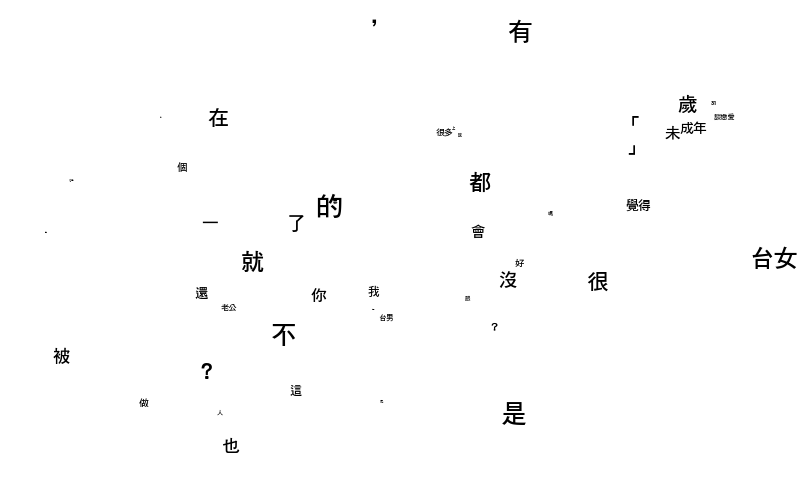

In [137]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt

font_path = '/content/drive/MyDrive/SOCI40133/粗黑體.ttc'
font_prop = FontProperties(fname=font_path)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha=0)
for i, word in enumerate(targetWords):
    ax.annotate(word, (tsneWords[:, 0][i], tsneWords[:, 1][i]), size=20 * (numWords - i) / numWords, fontproperties=font_prop)
plt.xticks(())
plt.yticks(())
plt.show()



# Doc2Vec

Instead of just looking at just how words embed within in the space, we can look at how the different documents relate to each other within the space. First lets load our data--abstracts of most U.S. physics papers from the 1950s.

In [87]:
apsDF = pd.read_csv('/content/drive/MyDrive/SOCI40133/data/APSabstracts1950s.csv', index_col = 0)

apsDF[:10]

,copyrightYear,doi,abstract
0,1950,10.1103/RevModPhys.22.221,A summarizing account is given of the research...
1,1951,10.1103/RevModPhys.23.147,New tables of coulomb functions are presented ...
2,1951,10.1103/RevModPhys.23.185,Ionization by electron impact in diatomic gase...
3,1951,10.1103/RevModPhys.23.203,It is shown that the conductivity in the ohmic...
4,1951,10.1103/RevModPhys.23.21,The factorization method is an operational pro...
5,1951,10.1103/RevModPhys.23.311,A brief account is given of Dyson's proof of t...
6,1951,10.1103/RevModPhys.23.315,A systematics is given of all transitions for ...
7,1951,10.1103/RevModPhys.23.322,A systematics of the -transitions of even A nu...
8,1951,10.1103/RevModPhys.23.328,The available experiments on the absorption sp...
9,1952,10.1103/RevModPhys.24.108,The classical theory of the dynamics of viscou...


We will load these as documents into Word2Vec, but first we need to normalize and pick some tags.

In [88]:
keywords = ['photomagnetoelectric', 'quantum', 'boltzmann', 'proton', 'positron', 'feynman', 'classical', 'relativity']

In [ ]:
apsDF['tokenized_words'] = apsDF['abstract'].apply(lambda x: lucem_illud.word_tokenize(x))
apsDF['normalized_words'] = apsDF['tokenized_words'].apply(lambda x: lucem_illud.normalizeTokens(x, lemma=False))

In [ ]:
from gensim.models.doc2vec import TaggedDocument

taggedDocs = []
for index, row in apsDF.iterrows():
    #Just doing a simple keyword assignment
    docKeywords = [s for s in keywords if s in row['normalized_words']]
    docKeywords.append(row['copyrightYear'])
    docKeywords.append(row['doi']) #This lets us extract individual documnets since doi's are unique
    taggedDocs.append(gensim.models.doc2vec.TaggedDocument(words = row['normalized_words'], tags = docKeywords))
apsDF['TaggedAbstracts'] = taggedDocs

Now we can train a Doc2Vec model:

In [ ]:
apsD2V = gensim.models.doc2vec.Doc2Vec(apsDF['TaggedAbstracts'], vector_size = 100) #Limiting to 100 dimensions

We can get vectors for the tags/documents, just as we did with words. Documents are actually the centroids (high dimensional average points) of their words.

In [ ]:
apsD2V.docvecs[1952]

The words can still be accessed in the same way:

In [ ]:
apsD2V['atom']

We can still use the ``most_similar`` command to perform simple semantic equations:

In [ ]:
apsD2V.wv.most_similar(positive = ['atom','electrons'], negative = ['electron'], topn = 1)

This is interesting. **Electron** is to **electrons** as **atom** is to **atoms**. Another way to understand this, developed below is: **electrons - electron** induces a singular to plural dimension, so when we subtract **electron** from **atom** and add **electrons**, we get **atoms**!

In [ ]:
apsD2V.wv.most_similar(positive = ['einstein','law'], negative = ['equation'], topn = 1)

In other words **Einstein** minus **equation** plus **law** equals **Meissner**--Walthur Meissner studied mechanical engineering and physics ... and was more likely to produce a "law" than a "equation", like the Meissner effect, the damping of the magnetic field in superconductors. If we built our word-embedding with a bigger corpus like the entire arXiv, a massive repository of physics preprints, we would see many more such relationships like **gravity - Newton + Einstein = relativity**.

We can also compute all of these *by hand*--explicitly wth vector algebra:

In [ ]:
sklearn.metrics.pairwise.cosine_similarity(apsD2V['electron'].reshape(1,-1), apsD2V['positron'].reshape(1,-1))
#We reorient the vectors with .reshape(1, -1) so that they can be computed without a warning in sklearn

In the doc2vec model, the documents have vectors just as the words do, so that we can compare documents with each other and also with words (similar to how a search engine locates a webpage with a query). First, we will calculate the distance between a word and documents in the dataset:

In [ ]:
apsD2V.docvecs.most_similar([ apsD2V['electron'] ], topn=5 )

If we search for the first of these on the web (these are doi codes), we find the following...a pretty good match:

In [ ]:
from IPython.display import Image
Image("PhysRev.98.875.jpg", width=1000, height=1000)

Now let's go the other way around and find words most similar to this document:

In [ ]:
apsD2V.wv.most_similar( [ apsD2V.docvecs['10.1103/PhysRev.98.875'] ], topn=5)

We can even look for documents most like a query composed of multiple words:

In [ ]:
apsD2V.docvecs.most_similar([ apsD2V['electron']+apsD2V['positron']+apsD2V['neutron']], topn=5 )

Now let's plot some words and documents against one another with a heatmap:

In [ ]:
heatmapMatrix = []
for tagOuter in keywords:
    column = []
    tagVec = apsD2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in keywords:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, apsD2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrix.append(column)
heatmapMatrix = np.array(heatmapMatrix)

In [ ]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrix, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrix.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrix.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(keywords, minor=False, rotation=270)
a = ax.set_yticklabels(keywords, minor=False)

Now let's look at a heatmap of similarities between the first ten documents in the corpus:

In [ ]:
targetDocs = apsDF['doi'][:10]

heatmapMatrixD = []

for tagOuter in targetDocs:
    column = []
    tagVec = apsD2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in targetDocs:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, apsD2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrixD.append(column)
heatmapMatrixD = np.array(heatmapMatrixD)

In [ ]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrixD, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrixD.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrixD.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(targetDocs, minor=False, rotation=270)
a = ax.set_yticklabels(targetDocs, minor=False)

Now let's look at a heatmap of similarities between the first ten documents and our keywords:

In [ ]:
heatmapMatrixC = []

for tagOuter in targetDocs:
    column = []
    tagVec = apsD2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in keywords:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, apsD2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrixC.append(column)
heatmapMatrixC = np.array(heatmapMatrixC)

In [ ]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrixC, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrixC.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrixC.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(keywords, minor=False, rotation=270)
a = ax.set_yticklabels(targetDocs, minor=False)

We will save the model in case we would like to use it again.

In [ ]:
apsD2V.save('apsW2V')

We can later load it:

In [ ]:
#apsD2V = gensim.models.word2vec.Word2Vec.load('data/apsW2V')

## <font color="red">*Exercise 2*</font>

<font color="red">Construct cells immediately below this that embed documents related to your final project using `doc2vec`, and explore the relationship between different documents and the word vectors you analyzed in the last exercise. Consider the most similar words to critical documents, analogies (doc _x_ + word _y_), and other additions and subtractions that reveal the structure of similarity and difference within your semantic space. What does this pattern reveal about the documentary organization of your semantic space?

In [138]:
keywords = ['台女','矜持','小孩','生','整形','結婚']

In [139]:
if 'level_0' in pttDF.columns:
    pttDF = pttDF.drop(columns=['level_0'])


pttDF = pttDF.reset_index(drop=True)

print(pttDF[:20])


                         user   board                          title     date  \
0             callhek (沒錢住帝寶)  C_Chat         [閒聊] 為什麼不能叫台女少買包包跟化妝品？  2023-10   
1                Daihao (TDH)  C_Chat                 [我推] 美彌子算是台女嗎？  2023-07   
2      alucard6310 (人生只為漫畫而活)  C_Chat            [閒聊] 台女V挑戰500元過一個禮拜  2023-07   
3               moocow (void)  C_Chat            Re: [閒聊] 小S是一代台女代表嗎  2023-06   
4       sakurammsrx (+9肥宅算盤子)  C_Chat            Re: [閒聊] 小S是一代台女代表嗎  2023-06   
5       arsl400 (dark hatter)  C_Chat            Re: [閒聊] 小S是一代台女代表嗎  2023-06   
6        oion13272613 (虛虛打八八)  C_Chat            Re: [閒聊] 小S是一代台女代表嗎  2023-06   
7           krousxchen (城府很深)  C_Chat            Re: [閒聊] 小S是一代台女代表嗎  2023-06   
8            wahaha99 (此方不可長)  C_Chat            Re: [閒聊] 小S是一代台女代表嗎  2023-06   
9              s7503228 (情報屋)  C_Chat            Re: [閒聊] 小S是一代台女代表嗎  2023-06   
10              aaaa8129 (阿睿)  C_Chat            Re: [閒聊] 小S是一代台女代表嗎  2023-06   
11         a235477919 (牛逼張學友

In [140]:
from gensim.models.doc2vec import TaggedDocument

taggedDocs = []
for index, row in pttDF.iterrows():
    docKeywords = [s for s in keywords if s in row['ckip_tokenized']]
    docKeywords.append(row['date'])
    docKeywords.append(row['index'])
    taggedDocs.append(gensim.models.doc2vec.TaggedDocument(words=row['ckip_tokenized'], tags=docKeywords))
pttDF['TaggedAbstracts'] = taggedDocs

KeyError: 'index'

In [ ]:
pttD2V = gensim.models.doc2vec.Doc2Vec(pttDF['TaggedAbstracts'], vector_size = 100) #Limiting to 100 dimensions

In [ ]:
pttD2V .docvecs[1952]

In [ ]:
pttD2V['女生']

In [ ]:
pttD2V.wv.most_similar(positive = ['女生','小孩'], negative = ['男人'], topn = 1)

In [ ]:
pttD2V.wv.most_similar(positive = ['男人','工作'], negative = ['小孩'], topn = 1)

In [ ]:
sklearn.metrics.pairwise.cosine_similarity(pttD2V['工作'].reshape(1,-1),pttD2V['女生'].reshape(1,-1))

In [ ]:
pttD2V.docvecs.most_similar([ pttD2V['上班'] ], topn=5 )

In [ ]:
pttD2V.docvecs.most_similar([ pttD2V['薪水']+pttD2V['當兵']+pttD2V['好']], topn=5 )

In [ ]:
heatmapMatrix = []
for tagOuter in keywords:
    column = []
    tagVec = pttD2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in keywords:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, pttD2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrix.append(column)
heatmapMatrix = np.array(heatmapMatrix)

In [ ]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import numpy as np


font_path = '/content/drive/MyDrive/SOCI40133/粗黑體.ttc'
font_prop = FontProperties(fname=font_path)

fig, ax = plt.subplots()

hmap = ax.pcolor(heatmapMatrix, cmap='terrain')

cbar = plt.colorbar(hmap)
cbar.set_label('cosine similarity', rotation=270)

a = ax.set_xticks(np.arange(heatmapMatrix.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrix.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(keywords, minor=False, rotation=270)
a = ax.set_yticklabels(keywords, minor=False)


for tick in ax.get_xticklabels():
    tick.set_fontproperties(font_prop)
for tick in ax.get_yticklabels():
    tick.set_fontproperties(font_prop)


plt.show()


In [ ]:
pttD2V.save('pttW2V')

# Projection

We can also project word vectors to an arbitray semantic dimension. To demonstrate this possibility, let's first load a model trained with New York Times news articles.

In [ ]:
nytimes_model = gensim.models.KeyedVectors.load_word2vec_format('nytimes_cbow.reduced.txt')

First we can visualize with dimension reduction

In [ ]:
#words to create dimensions
tnytTargetWords = ['man','him','he', 'woman', 'her', 'she', 'black','blacks','African', 'white', 'whites', 'Caucasian', 'rich', 'richer', 'richest', 'expensive', 'wealthy', 'poor', 'poorer', 'poorest', 'cheap', 'inexpensive']
#words we will be mapping
tnytTargetWords += ["doctor","lawyer","plumber","scientist","hairdresser", "nanny","carpenter","entrepreneur","musician","writer", "banker","poet","nurse", "steak", "bacon", "croissant", "cheesecake", "salad", "cheeseburger", "vegetables", "beer", "wine", "pastry", "basketball", "baseball", "boxing", "softball", "volleyball", "tennis", "golf", "hockey", "soccer"]


wordsSubMatrix = []
for word in tnytTargetWords:
    wordsSubMatrix.append(nytimes_model[word])
wordsSubMatrix = np.array(wordsSubMatrix)
#wordsSubMatrix

In [ ]:
pcaWordsNYT = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_dataNYT = pcaWordsNYT.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWordsNYT = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_dataNYT)

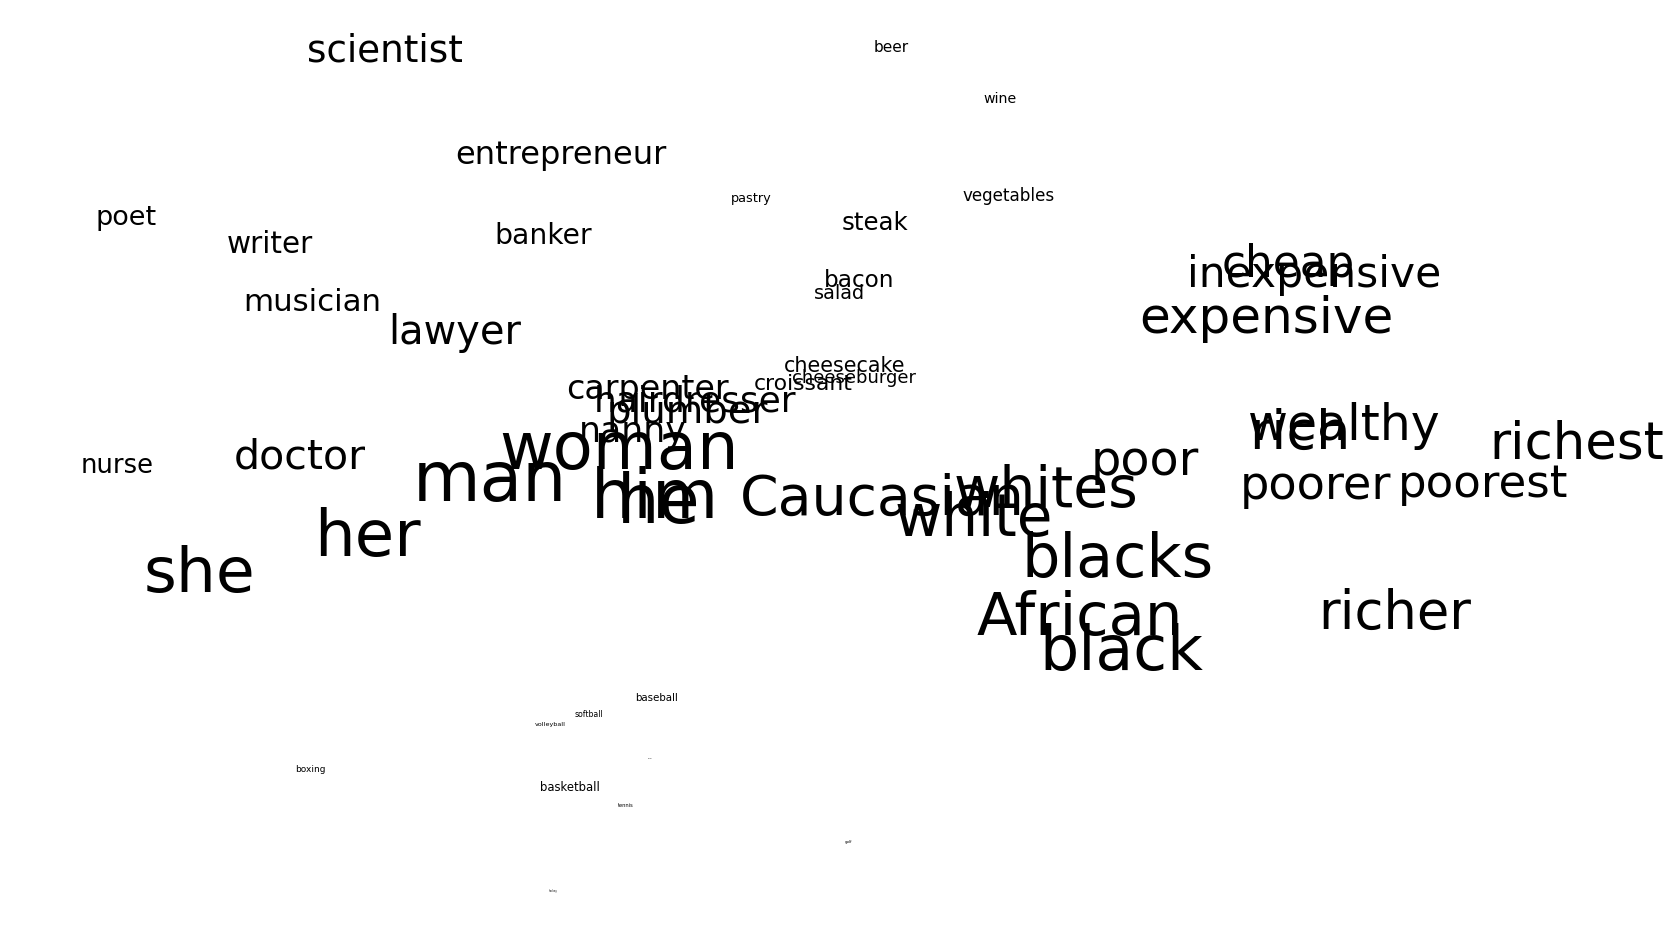

In [ ]:
fig = plt.figure(figsize = (20,12))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWordsNYT[:, 0], tsneWordsNYT[:, 1], alpha = 0) #Making the points invisible
for i, word in enumerate(tnytTargetWords):
    ax.annotate(word, (tsneWordsNYT[:, 0][i],tsneWordsNYT[:, 1][i]), size =  50 * (len(tnytTargetWords) - i) / len(tnytTargetWords))
plt.xticks(())
plt.yticks(())
plt.show()

Define some convenient functions for getting dimensions.

In [ ]:
def normalize(vector):
    normalized_vector = vector / np.linalg.norm(vector)
    return normalized_vector

def dimension(model, positives, negatives):
    diff = sum([normalize(model[x]) for x in positives]) - sum([normalize(model[y]) for y in negatives])
    return diff

Let's calculate three dimensions: gender, race, and class.

In [ ]:
Gender = dimension(nytimes_model, ['man','him','he'], ['woman', 'her', 'she'])
Race = dimension(nytimes_model, ['black','blacks','African'], ['white', 'whites', 'Caucasian'])
Class = dimension(nytimes_model, ['rich', 'richer', 'richest', 'expensive', 'wealthy'], ['poor', 'poorer', 'poorest', 'cheap', 'inexpensive'])

Here we have some words.

In [ ]:
Occupations = ["doctor","lawyer","plumber","scientist","hairdresser", "nanny","carpenter","entrepreneur","musician","writer", "banker","poet","nurse"]

Foods = ["steak", "bacon", "croissant", "cheesecake", "salad", "cheeseburger", "vegetables", "beer", "wine", "pastry"]

Sports  = ["basketball", "baseball", "boxing", "softball", "volleyball", "tennis", "golf", "hockey", "soccer"]

Define a function to project words in a word list to each of the three dimensions.

In [ ]:
def makeDF(model, word_list):
    g = []
    r = []
    c = []
    for word in word_list:
        g.append(sklearn.metrics.pairwise.cosine_similarity(nytimes_model[word].reshape(1,-1), Gender.reshape(1,-1))[0][0])
        r.append(sklearn.metrics.pairwise.cosine_similarity(nytimes_model[word].reshape(1,-1), Race.reshape(1,-1))[0][0])
        c.append(sklearn.metrics.pairwise.cosine_similarity(nytimes_model[word].reshape(1,-1), Class.reshape(1,-1))[0][0])
    df = pd.DataFrame({'gender': g, 'race': r, 'class': c}, index = word_list)
    return df

Get the projections.

In [ ]:
OCCdf = makeDF(nytimes_model, Occupations)
Fooddf = makeDF(nytimes_model, Foods)
Sportsdf = makeDF(nytimes_model, Sports)

Define some useful functions for plotting.

In [ ]:
def Coloring(Series):
    x = Series.values
    y = x-x.min()
    z = y/y.max()
    c = list(plt.cm.rainbow(z))
    return c

def PlotDimension(ax,df, dim):
    ax.set_frame_on(False)
    ax.set_title(dim, fontsize = 20)
    colors = Coloring(df[dim])
    for i, word in enumerate(df.index):
        ax.annotate(word, (0, df[dim][i]), color = colors[i], alpha = 0.6, fontsize = 12)
    MaxY = df[dim].max()
    MinY = df[dim].min()
    plt.ylim(MinY,MaxY)
    plt.yticks(())
    plt.xticks(())

Plot the occupational words in each of the three dimensions.

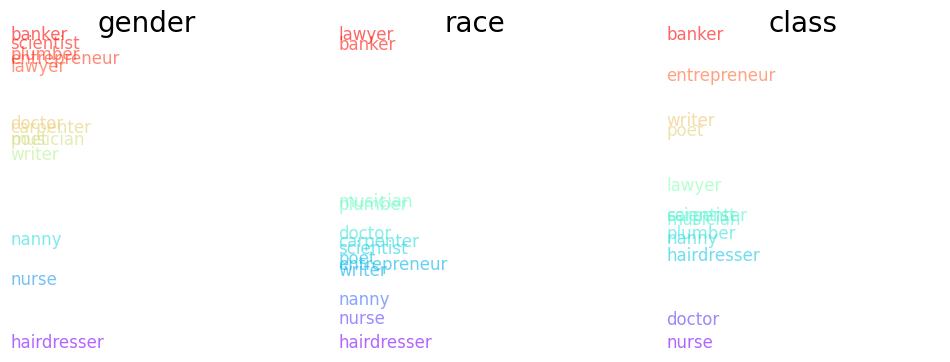

In [ ]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, OCCdf, 'gender')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, OCCdf, 'race')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, OCCdf, 'class')
plt.show()

Foods:

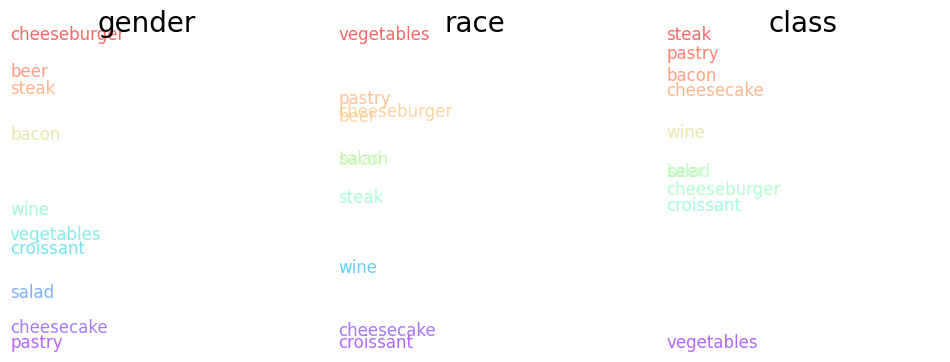

In [ ]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Fooddf, 'gender')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Fooddf, 'race')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, Fooddf, 'class')
plt.show()

Sports:

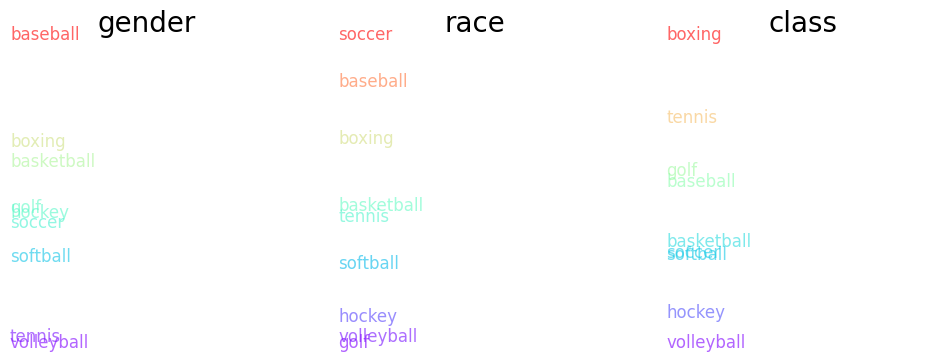

In [ ]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Sportsdf, 'gender')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Sportsdf, 'race')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, Sportsdf, 'class')
plt.show()

## <font color="red">*Exercise 3*</font>

<font color="red">Construct cells immediately below this that embed documents related to your final project, then generate meaningful semantic dimensions based on your theoretical understanding of the semantic space (i.e., by subtracting semantically opposite word vectors) and project another set of word vectors onto those dimensions. Interpret the meaning of these projections for your analysis. Which of the dimensions you analyze explain the most variation in the projection of your words and why?

<font color="red">***Stretch***: Average together multiple antonym pairs to create robust semantic dimensions. How do word projections on these robust dimensions differ from single-pair dimensions?

In [ ]:
ptt_vectors_list = [0, 1, 2, 3, 4]  # 使用 DataFrame 中的索引或其他整數值
ptt_vectors = [pttD2V.dv[doc] for doc in ptt_vectors_list]
ptt_vectors = np.vstack(ptt_vectors)

In [ ]:
nytimes_model = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/MyDrive/SOCI40133/data/nytimes_cbow.reduced.txt')

In [ ]:
available_words = nytimes_model.key_to_index.keys()
my = [ 'smartphone', 'computer', 'software', 'camera', 'drone','vehicle', 'device', 'chip', 'network', 'program', 'data', 'code' ]
for m in my:
  if m not in available_words:
    print(m)
#print(available_words)


In [ ]:
# Words to create dimensions
tnytTargetWords = ['child', 'adult', 'elderly', 'baby', 'man', 'woman','boy','girl', 'transgender', 'gay', 'lesbian','straight', 'married', 'single']

tnytTargetWords += ['Seattle','Chicago','Oakland','Austin','Boston','Houston','Toronto','Miami','ballet', 'hip-hop', 'basketball', 'soccer', 'hockey', 'football', 'tennis', 'tennis',]

wordsSubMatrix = []
for word in tnytTargetWords:
    wordsSubMatrix.append(nytimes_model[word])
wordsSubMatrix = np.array(wordsSubMatrix)
#wordsSubMatrix

In [ ]:
tsneWordsNYT = sklearn.manifold.TSNE(n_components=2, perplexity=5).fit_transform(reducedPCA_dataNYT)


In [ ]:
fig = plt.figure(figsize = (20,12))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWordsNYT[:, 0], tsneWordsNYT[:, 1], alpha = 0) #Making the points invisible
for i, word in enumerate(tnytTargetWords):
    ax.annotate(word, (tsneWordsNYT[:, 0][i],tsneWordsNYT[:, 1][i]), size =  50 * (len(tnytTargetWords) - i) / len(tnytTargetWords))
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
def normalize(vector):
    normalized_vector = vector / np.linalg.norm(vector)
    return normalized_vector

def dimension(model, positives, negatives):
    diff = sum([normalize(model[x]) for x in positives]) - sum([normalize(model[y]) for y in negatives])
    return diff

In [ ]:
Gender = dimension(nytimes_model, ['man','him','he'], ['woman', 'her', 'she'])
Marry = dimension(nytimes_model, ['marry'], ['single'])
Healthy = dimension(nytimes_model, ['health','healthy'],['sick','ill'])

In [ ]:
Cities = ["Seattle", "Chicago", "Oakland", "Austin", "Boston", "Houston", "Toronto", "Miami"]


Emotions = ["joy", "sad", "anger", "fear", "surprise", "happy", "regret", "surprise", "shame", "pride", "confusion", "approval", "anxiety"]


Technology  = [ 'smartphone', 'computer', 'software', 'camera', 'drone','vehicle', 'device', 'chip', 'network', 'program', 'data', 'code' ]

In [242]:
def makeDF(model, word_list):
    g = []
    r = []
    c = []
    for word in word_list:
        g.append(sklearn.metrics.pairwise.cosine_similarity(nytimes_model[word].reshape(1,-1), Gender.reshape(1,-1))[0][0])
        r.append(sklearn.metrics.pairwise.cosine_similarity(nytimes_model[word].reshape(1,-1), Race.reshape(1,-1))[0][0])
        c.append(sklearn.metrics.pairwise.cosine_similarity(nytimes_model[word].reshape(1,-1), Class.reshape(1,-1))[0][0])
    df = pd.DataFrame({'Gender': g, 'Marry': r, 'Healthy': c}, index = word_list)
    return df

In [ ]:
citiesdf = makeDF(nytimes_model, Cities)
emotionsdf = makeDF(nytimes_model, Emotions)
technologydf = makeDF(nytimes_model, Technology)

In [ ]:
def Coloring(Series):
    x = Series.values
    y = x-x.min()
    z = y/y.max()
    c = list(plt.cm.rainbow(z))
    return c

def PlotDimension(ax,df, dim):
    ax.set_frame_on(False)
    ax.set_title(dim, fontsize = 20)
    colors = Coloring(df[dim])
    for i, word in enumerate(df.index):
        ax.annotate(word, (0, df[dim][i]), color = colors[i], alpha = 0.6, fontsize = 12)
    MaxY = df[dim].max()
    MinY = df[dim].min()
    plt.ylim(MinY,MaxY)
    plt.yticks(())
    plt.xticks(())

In [ ]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, citiesdf, 'Gender')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, citiesdf, 'Marry')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, citiesdf, 'Healthy')
plt.show()

In [ ]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, emotionsdf, 'Gender')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, emotionsdf, 'Marry')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, emotionsdf, 'Healthy')
plt.show()

In [ ]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, technologydf, 'Gender')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, technologydf, 'Marry')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, technologydf, 'Healthy')
plt.show()

# Linguistic Change or Difference

Below is code that aligns the dimensions of multiple embeddings arrayed over time or some other dimension and allow identification of semantic chanage as the word vectors change their loadings for focal words. This code comes from the approach piloted at Stanford by William Hamilton, Daniel Jurafsky and Jure Lescovec [here](https://arxiv.org/pdf/1605.09096.pdf).

In [5]:
import copy

In [6]:
def calc_syn0norm(model):
    """since syn0norm is now depricated"""
    return (model.wv.syn0 / np.sqrt((model.wv.syn0 ** 2).sum(-1))[..., np.newaxis]).astype(np.float32)

def smart_procrustes_align_gensim(base_embed, other_embed, words=None):
    """Procrustes align two gensim word2vec models (to allow for comparison between same word across models).
    Code ported from HistWords <https://github.com/williamleif/histwords> by William Hamilton <wleif@stanford.edu>.
    (With help from William. Thank you!)
    First, intersect the vocabularies (see `intersection_align_gensim` documentation).
    Then do the alignment on the other_embed model.
    Replace the other_embed model's syn0 and syn0norm numpy matrices with the aligned version.
    Return other_embed.
    If `words` is set, intersect the two models' vocabulary with the vocabulary in words (see `intersection_align_gensim` documentation).
    """
    base_embed = copy.copy(base_embed)
    other_embed = copy.copy(other_embed)
    # make sure vocabulary and indices are aligned
    in_base_embed, in_other_embed = intersection_align_gensim(base_embed, other_embed, words=words)

    # get the embedding matrices
    # base_vecs = calc_syn0norm(in_base_embed)
    # other_vecs = calc_syn0norm(in_other_embed)
    base_vecs= [in_base_embed.wv.get_vector(w,norm=True) for w in set(in_base_embed.wv.index_to_key)]
    other_vecs= [in_other_embed.wv.get_vector(w,norm=True) for w in set(in_other_embed.wv.index_to_key)]

    # just a matrix dot product with numpy
    m = np.array(other_vecs).T.dot(np.array(base_vecs))
    # SVD method from numpy
    u, _, v = np.linalg.svd(m)
    # another matrix operation
    ortho = u.dot(v)
    # Replace original array with modified one
    # i.e. multiplying the embedding matrix (syn0norm)by "ortho"
    other_embed.wv.vectors =(np.array(other_vecs)).dot(ortho)
    return other_embed

def intersection_align_gensim(m1,m2, words=None):
    """
    Intersect two gensim word2vec models, m1 and m2.
    Only the shared vocabulary between them is kept.
    If 'words' is set (as list or set), then the vocabulary is intersected with this list as well.
    Indices are re-organized from 0..N in order of descending frequency (=sum of counts from both m1 and m2).
    These indices correspond to the new syn0 and syn0norm objects in both gensim models:
        -- so that Row 0 of m1.syn0 will be for the same word as Row 0 of m2.syn0
        -- you can find the index of any word on the .index2word list: model.index2word.index(word) => 2
    The .vocab dictionary is also updated for each model, preserving the count but updating the index.
    """

    # Get the vocab for each model
    vocab_m1 = set(m1.wv.index_to_key)
    vocab_m2 = set(m2.wv.index_to_key)

    # Find the common vocabulary
    common_vocab = vocab_m1&vocab_m2
    if words: common_vocab&=set(words)

    # If no alignment necessary because vocab is identical...
    if not vocab_m1-common_vocab and not vocab_m2-common_vocab:
        return (m1,m2)

    # Otherwise sort by frequency (summed for both)
    common_vocab = list(common_vocab)
    common_vocab.sort(key=lambda w: m1.wv.get_vecattr(w, "count")  + m2.wv.get_vecattr(w, "count") ,reverse=True)

    # Then for each model...
    for m in [m1,m2]:
        # Replace old syn0norm array with new one (with common vocab)
        new_arr = [m.wv.get_vector(w,norm=True) for w in common_vocab]

        # Replace old vocab dictionary with new one (with common vocab)
        # and old index2word with new one
        m.index2word = common_vocab
        # old_vocab = m.wv.index_to_key
        new_vocab = []
        k2i={}
        for new_index,word in enumerate(common_vocab):
            new_vocab.append(word)
            k2i[word]=new_index
        m.wv.index_to_key=new_vocab
        m.wv.key_to_index=k2i
        m.wv.vectors=np.array(new_arr)

    return (m1,m2)

In order to explore this, let's get some data that follows a time trend. We'll look at conference proceedings from the American Society for Clinical Oncologists.

In [7]:
apsDF = pd.read_csv("/content/drive/MyDrive/SOCI40133/data/APSabstracts1950s.csv", index_col=0)

Prepare for wor2vec:

In [8]:
apsDF['tokenized_sents'] = apsDF['abstract'].apply(lambda x: [lucem_illud.word_tokenize(s) for s in lucem_illud.sent_tokenize(x)])
apsDF['normalized_sents'] = apsDF['tokenized_sents'].apply(lambda x: [lucem_illud.normalizeTokens(s) for s in x])

/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [9]:
apsDF.head()

,copyrightYear,doi,abstract,tokenized_sents,normalized_sents
0,1950,10.1103/RevModPhys.22.221,A summarizing account is given of the research...,"[[A, summarizing, account, is, given, of, the,...","[[summarizing, account, give, research, barium..."
1,1951,10.1103/RevModPhys.23.147,New tables of coulomb functions are presented ...,"[[New, tables, of, coulomb, functions, are, pr...","[[new, table, coulomb, function, present, intr..."
2,1951,10.1103/RevModPhys.23.185,Ionization by electron impact in diatomic gase...,"[[Ionization, by, electron, impact, in, diatom...","[[ionization, electron, impact, diatomic, gas,..."
3,1951,10.1103/RevModPhys.23.203,It is shown that the conductivity in the ohmic...,"[[It, is, shown, that, the, conductivity, in, ...","[[show, conductivity, ohmic, cuprous, oxide, l..."
4,1951,10.1103/RevModPhys.23.21,The factorization method is an operational pro...,"[[The, factorization, method, is, an, operatio...","[[factorization, method, operational, procedur..."


We will be creating many embeddings so we have created this function to do most of the work. It creates two collections of embeddings, one the original and one the aligned.

In [10]:
def compareModels(df, category, text_column_name='normalized_sents', sort = True, embeddings_raw={}):
    """If you are using time as your category sorting is important"""
    if len(embeddings_raw) == 0:
        embeddings_raw = rawModels(df, category, text_column_name, sort)
    cats = sorted(set(df[category]))
    #These are much quicker
    embeddings_aligned = {}
    for catOuter in cats:
        embeddings_aligned[catOuter] = [embeddings_raw[catOuter]]
        for catInner in cats:
            embeddings_aligned[catOuter].append(smart_procrustes_align_gensim(embeddings_aligned[catOuter][-1], embeddings_raw[catInner]))
    return embeddings_raw, embeddings_aligned

In [11]:
def rawModels(df, category, text_column_name='normalized_sents', sort = True):
    embeddings_raw = {}
    cats = sorted(set(df[category]))
    for cat in cats:
        #This can take a while
        print("Embedding {}".format(cat), end = '\r')
        subsetDF = df[df[category] == cat]
        #You might want to change the W2V parameters
        embeddings_raw[cat] = gensim.models.word2vec.Word2Vec(subsetDF[text_column_name].sum())
    return embeddings_raw

Now we generate the models:

In [12]:
rawEmbeddings, comparedEmbeddings = compareModels(apsDF, 'copyrightYear')

In [13]:
rawEmbeddings.keys()

dict_keys([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959])

We need to compare them across all permutions so we will define another function to help, we will be using 1 - cosine similarity as that gives a more intitive range of 0-2 with low values meaning little change and high meaning lots of change.

In [14]:
def getDivergenceDF(word, embeddingsDict):
    dists = []
    cats = sorted(set(embeddingsDict.keys()))
    dists = {}
    print(word)
    for cat in cats:
        dists[cat] = []
        for embed in embeddingsDict[cat][1:]:
            dists[cat].append(np.abs(1 - sklearn.metrics.pairwise.cosine_similarity(np.expand_dims(embeddingsDict[cat][0].wv[word], axis = 0),
                                                                             np.expand_dims(embed.wv[word], axis = 0))[0,0]))
    return pd.DataFrame(dists, index = cats)

Lets look at a couple words:

radioactive


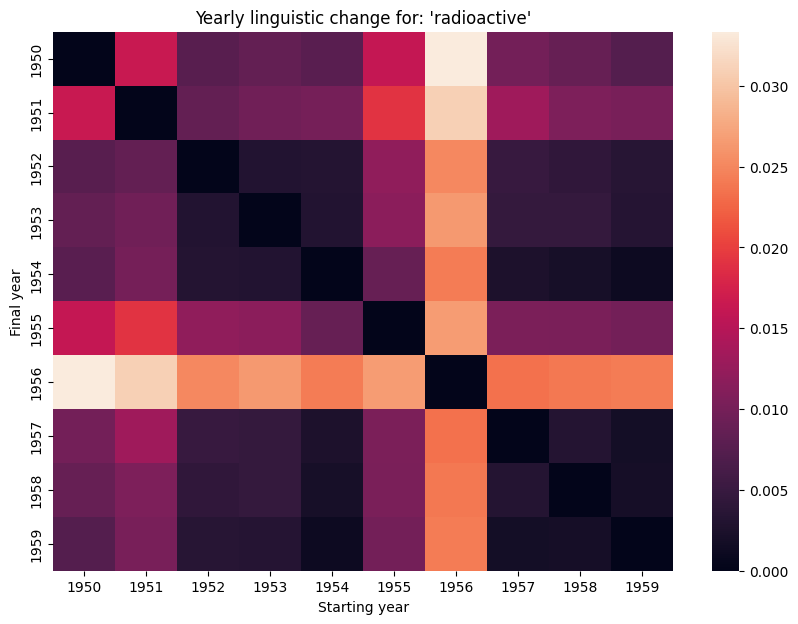

In [15]:
targetWord = 'radioactive'

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

area


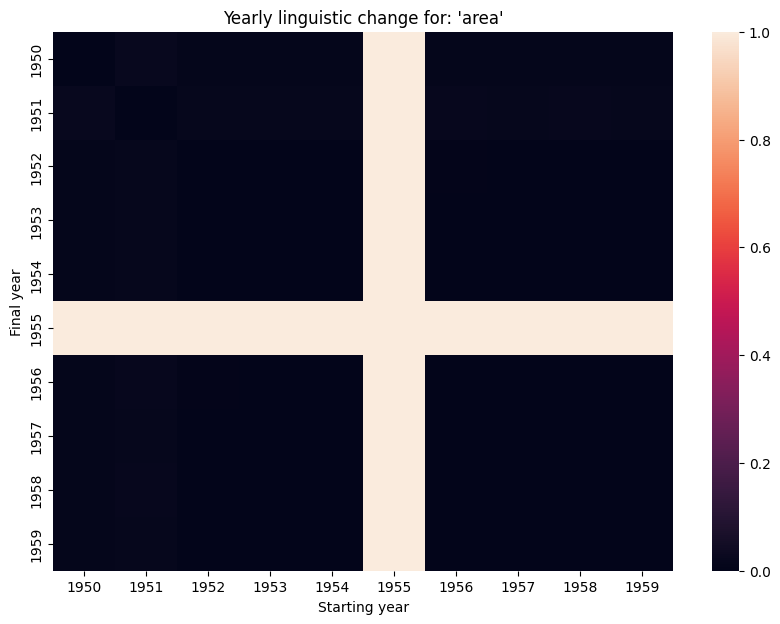

In [16]:
targetWord = 'area'

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

In [17]:
def findDiverence(word, embeddingsDict):
    cats = sorted(set(embeddingsDict.keys()))

    dists = []
    for embed in embeddingsDict[cats[0]][1:]:
        try:
            dists.append(1 - sklearn.metrics.pairwise.cosine_similarity(np.expand_dims(embeddingsDict[cats[0]][0].wv[word], axis = 0), np.expand_dims(embed.wv[word], axis = 0))[0,0])
        except:
            pass
    return np.mean(dists)

def findMostDivergent(embeddingsDict):
    original_words = comparedEmbeddings[1950][0].wv.index_to_key
    for embeds in embeddingsDict.values():
        for embed in embeds:
            original_words = set(original_words).intersection(set(embed.wv.index_to_key))
    words = set(original_words)
    print("Found {} words to compare".format(len(words)))
    return sorted([(w, findDiverence(w, embeddingsDict)) for w in words], key = lambda x: x[1], reverse=True)


In [18]:
wordDivergences = findMostDivergent(comparedEmbeddings)

Found 843 words to compare


The most divergent words are:

In [19]:
wordDivergences[:20]

[('satisfactory', 0.9999997988997297),
 ('depend', 0.9999997087399306),
 ('fine', 0.9999989637219768),
 ('broaden', 0.4060078645466092),
 ('combine', 0.31574432270266184),
 ('t', 0.3116149713499453),
 ('state', 0.31127584649397166),
 ('neutral', 0.3108055951862667),
 ('j', 0.30853296045877415),
 ('hr', 0.30780515775153744),
 ('treat', 0.3071150135531354),
 ('transfer', 0.3068389352761045),
 ('prove', 0.306508024104609),
 ('position', 0.3061745146462215),
 ('apparatus', 0.3060485758257684),
 ('analysis', 0.3058300806209047),
 ('path', 0.3055891424287368),
 ('h', 0.3055744965202507),
 ('d', 0.3055313882880128),
 ('presence', 0.3051241999479307)]

And the least:

In [20]:
wordDivergences[-20:]

[('masse', 0.0074830114841461185),
 ('nucleon', 0.007451605796813965),
 ('relationship', 0.007400530576705933),
 ('curie', 0.007393789291381836),
 ('ag', 0.007373315095901489),
 ('establish', 0.007364493608474731),
 ('small', 0.007361102104187012),
 ('applicable', 0.007220178842544556),
 ('recently', 0.0071876227855682375),
 ('geomagnetic', 0.007153934240341187),
 ('connect', 0.007130974531173706),
 ('activation', 0.007121354341506958),
 ('coefficient', 0.007116305828094483),
 ('diameter', 0.007097721099853516),
 ('effective', 0.007066583633422852),
 ('neglect', 0.007000339031219482),
 ('true', 0.006942129135131836),
 ('neighbor', 0.006847304105758667),
 ('barrier', 0.006701630353927612),
 ('representation', 0.00658993124961853)]

radioactive


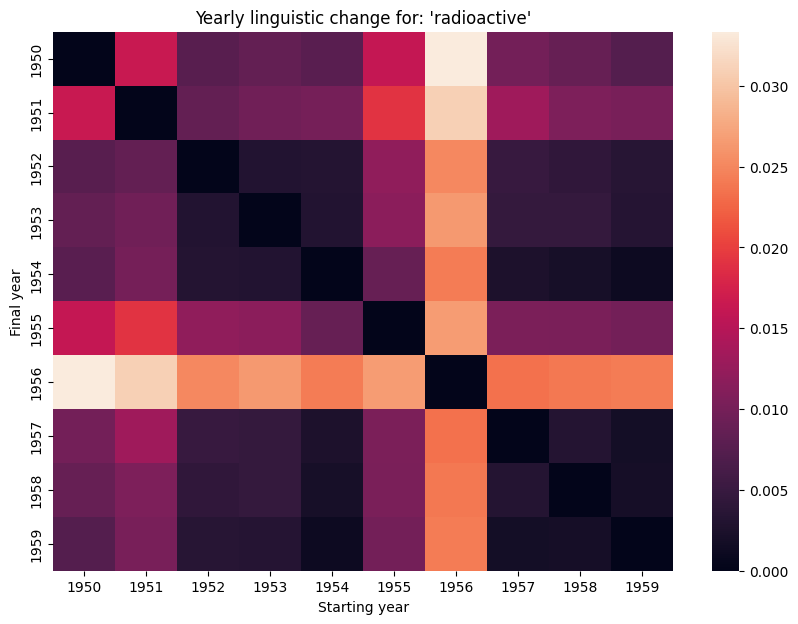

In [21]:
targetWord = wordDivergences[-200][0]

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

representation


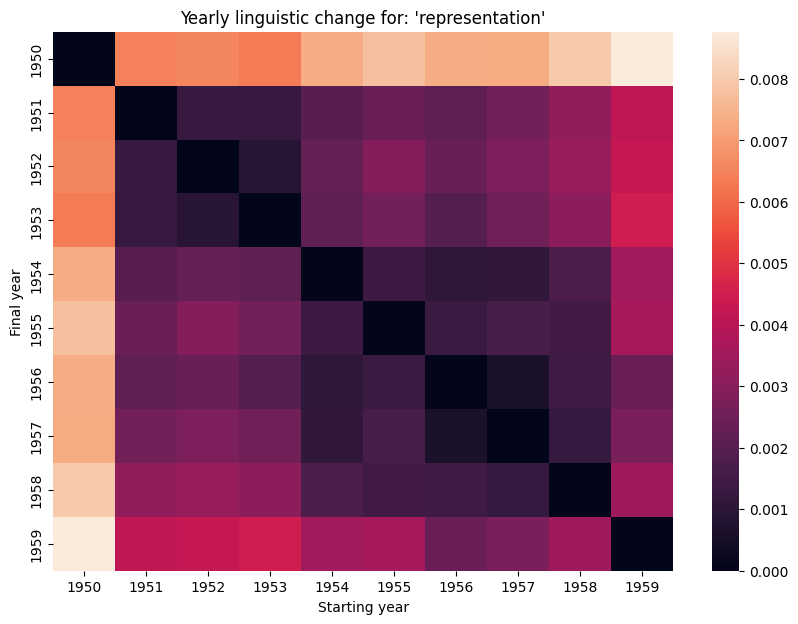

In [22]:
targetWord = wordDivergences[-1][0]

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

In [ ]:
##We only use a small data here so some of the results may not make sense. You can try the algorithm on your own data!

## COHA

COHA is a historial dataset so it ends up being a good choice to try the same analysis we just did across three different time periods.

We will be using the same data loading procedure as the last notebook, so go through the process to make sure you know what's going on.

In [23]:
corpora_address = "/content/drive/MyDrive/SOCI40133/COHA"

In [24]:
coha_texts = lucem_illud.loadDavies(corpora_address, return_raw=True)

text_1810s_kso.zip
text_1820s_jsi.zip
text_1830s_bsu.zip
text_1840s_nsq.zip
text_1850s_jpr.zip
text_1860s_psi.zip
text_1870s_vuy.zip
text_1880s_azz.zip
text_1890s_jsq.zip
text_1900s_mse.zip
text_1910s_jue.zip
text_1920s_gte.zip
text_1930s_bie.zip
text_1940s_bsw.zip
text_1950s_ndz.zip
text_1960s_xus.zip
text_1970s_jfy.zip
text_1980s_bkk.zip
text_1990s_bsj.zip
text_2000s_scc.zip


Cool - let us now create our different epochs. This is an important step: I will be using the same 5 epochs I did in the DTM example, but you are recommended to play around with this. I will create a dataframe which logs the year and the genre.

In [25]:
coha_df = pd.DataFrame(columns=["Year", "Genre", "Epoch", "normalized sents"])

In [26]:
for article in coha_texts:
    genre, year, id_ = article.split("_")

    year = int(year)

    if year > 1810 and year < 1880:
        epoch = 0
    if year >= 1880 and year < 1913:
        epoch = 1
    if year >= 1913 and year < 1950:
        epoch = 2
    if year >= 1950 and year < 1990:
        epoch = 3
    if year >= 1990:
        epoch = 4

    try:
        if len(coha_texts[article][2]) < 1500000:
            coha_df.loc[id_] = [year, genre, epoch, lucem_illud.normalizeTokens(coha_texts[article][2].decode("utf-8"), lemma=False)]
    except TypeError:
        continue
    except IndexError:
        continue

KeyboardInterrupt: 

We can now arrange our word embeddings by either year, genre, or epoch, and see how the words in each of those contexts change.

In [ ]:
rawEmbeddings_epoch = rawModels(coha_df, 'Epoch', text_column_name='normalized sents')

In [ ]:
# rawEmbeddings_genre = rawModels(coha_df, 'Genre', text_column_name='normalized sents')

We now have the raw embeddings for epoch and genre. You can test out the previous analysis on words of your choice.

In [ ]:
for epoch, embedding in enumerate(rawEmbeddings_epoch):
    model = rawEmbeddings_epoch[embedding]
    name = "embedding_epoch_" + str(epoch)
    model.save(name)

In [ ]:
# for embedding in rawEmbeddings_genre:
#     model = rawEmbeddings_genre[embedding]
#     name = "embedding_genre_" + embedding
#     model.save(name)

In [ ]:
from gensim.models import Word2Vec

In [ ]:
def file_to_embeddings(address, kind):
    rawEmbeddings = {}
    for file in os.listdir(address):
        if "embedding_"+kind in file:
            e, kind_, kind_type = file.split("_")
            kind_type = eval(kind_type)
            rawEmbeddings[kind_type] = Word2Vec.load(file)
    return rawEmbeddings

In [ ]:
# rawEmbeddings_genre_load = file_to_embeddings(".", "genre")

In [ ]:
rawEmbeddings_epoch_load = file_to_embeddings(".", "epoch")

In [ ]:
rawEmbeddings_epoch_load.keys()

In [ ]:
rawEmbeddings_epoch, compared_epoch = compareModels(coha_df, 'Epoch', text_column_name='normalized sents', embeddings_raw=rawEmbeddings_epoch_load)

In [ ]:
# rawEmbeddings_genre, compared_genre = compareModels(coha_df, 'Genre', text_column_name='normalized sents', embeddings_raw=rawEmbeddings_genre_load)

You now have access to the epoch wise embeddings, and the code to train models genre wise (commented out). You can use the original embeddings, the compared embeddings and such to perform the analysis we did before.

## <font color="red">*Exercise 4*</font>

<font color="red">Construct cells immediately below this that align word embeddings over time or across domains/corpora. Interrogate the spaces that result and ask which words changed most and least over the entire period or between contexts/corpora. What does this reveal about the social game underlying your space?

In [209]:
def calc_syn0norm(model):
    """since syn0norm is now depricated"""
    return (model.wv.syn0 / np.sqrt((model.wv.syn0 ** 2).sum(-1))[..., np.newaxis]).astype(np.float32)

def smart_procrustes_align_gensim(base_embed, other_embed, words=None):
    """Procrustes align two gensim word2vec models (to allow for comparison between same word across models).
    Code ported from HistWords <https://github.com/williamleif/histwords> by William Hamilton <wleif@stanford.edu>.
    (With help from William. Thank you!)
    First, intersect the vocabularies (see `intersection_align_gensim` documentation).
    Then do the alignment on the other_embed model.
    Replace the other_embed model's syn0 and syn0norm numpy matrices with the aligned version.
    Return other_embed.
    If `words` is set, intersect the two models' vocabulary with the vocabulary in words (see `intersection_align_gensim` documentation).
    """
    base_embed = copy.copy(base_embed)
    other_embed = copy.copy(other_embed)
    # make sure vocabulary and indices are aligned
    in_base_embed, in_other_embed = intersection_align_gensim(base_embed, other_embed, words=words)

    # get the embedding matrices
    # base_vecs = calc_syn0norm(in_base_embed)
    # other_vecs = calc_syn0norm(in_other_embed)
    base_vecs= [in_base_embed.wv.get_vector(w,norm=True) for w in set(in_base_embed.wv.index_to_key)]
    other_vecs= [in_other_embed.wv.get_vector(w,norm=True) for w in set(in_other_embed.wv.index_to_key)]

    if not base_vecs or not other_vecs:
        #print("One or both embedding matrices are empty. Skipping alignment.")
        return other_embed


    # just a matrix dot product with numpy
    m = np.array(other_vecs).T.dot(np.array(base_vecs))
    # SVD method from numpy
    u, _, v = np.linalg.svd(m)
    # another matrix operation
    ortho = u.dot(v)
    # Replace original array with modified one
    # i.e. multiplying the embedding matrix (syn0norm)by "ortho"
    other_embed.wv.vectors =(np.array(other_vecs)).dot(ortho)
    return other_embed

def intersection_align_gensim(m1,m2, words=None):
    """
    Intersect two gensim word2vec models, m1 and m2.
    Only the shared vocabulary between them is kept.
    If 'words' is set (as list or set), then the vocabulary is intersected with this list as well.
    Indices are re-organized from 0..N in order of descending frequency (=sum of counts from both m1 and m2).
    These indices correspond to the new syn0 and syn0norm objects in both gensim models:
        -- so that Row 0 of m1.syn0 will be for the same word as Row 0 of m2.syn0
        -- you can find the index of any word on the .index2word list: model.index2word.index(word) => 2
    The .vocab dictionary is also updated for each model, preserving the count but updating the index.
    """

    # Get the vocab for each model
    vocab_m1 = set(m1.wv.index_to_key)
    vocab_m2 = set(m2.wv.index_to_key)

    # Find the common vocabulary
    common_vocab = vocab_m1&vocab_m2
    if words: common_vocab&=set(words)

    # If no alignment necessary because vocab is identical...
    if not vocab_m1-common_vocab and not vocab_m2-common_vocab:
        return (m1,m2)

    # Otherwise sort by frequency (summed for both)
    common_vocab = list(common_vocab)
    common_vocab.sort(key=lambda w: m1.wv.get_vecattr(w, "count")  + m2.wv.get_vecattr(w, "count") ,reverse=True)

    # Then for each model...
    for m in [m1,m2]:
        # Replace old syn0norm array with new one (with common vocab)
        new_arr = [m.wv.get_vector(w,norm=True) for w in common_vocab]

        # Replace old vocab dictionary with new one (with common vocab)
        # and old index2word with new one
        m.index2word = common_vocab
        # old_vocab = m.wv.index_to_key
        new_vocab = []
        k2i={}
        for new_index,word in enumerate(common_vocab):
            new_vocab.append(word)
            k2i[word]=new_index
        m.wv.index_to_key=new_vocab
        m.wv.key_to_index=k2i
        m.wv.vectors=np.array(new_arr)

    return (m1,m2)

In [211]:
apsDF = pd.read_csv("/content/drive/MyDrive/SOCI40133/data/APSabstracts1950s.csv", index_col=0)

In [216]:
apsDF['tokenized_sents'] = apsDF['abstract'].apply(lambda x: [lucem_illud.word_tokenize(s) for s in lucem_illud.sent_tokenize(x)])
apsDF['normalized_sents'] = apsDF['tokenized_sents'].apply(lambda x: [lucem_illud.normalizeTokens(s) for s in x])

In [217]:
def compareModels(df, category, text_column_name='normalized_sents', sort = True, embeddings_raw={}):
    """If you are using time as your category sorting is important"""
    if len(embeddings_raw) == 0:
        embeddings_raw = rawModels(df, category, text_column_name, sort)
    cats = sorted(set(df[category]))
    #These are much quicker
    embeddings_aligned = {}
    for catOuter in cats:
        embeddings_aligned[catOuter] = [embeddings_raw[catOuter]]
        for catInner in cats:
            embeddings_aligned[catOuter].append(smart_procrustes_align_gensim(embeddings_aligned[catOuter][-1], embeddings_raw[catInner]))
    return embeddings_raw, embeddings_aligned

In [218]:
def rawModels(df, category, text_column_name='normalized_sents', sort = True):
    embeddings_raw = {}
    cats = sorted(set(df[category]))
    for cat in cats:
        #This can take a while
        print("Embedding {}".format(cat), end = '\r')
        subsetDF = df[df[category] == cat]
        #You might want to change the W2V parameters
        embeddings_raw[cat] = gensim.models.word2vec.Word2Vec(subsetDF[text_column_name].sum())
    return embeddings_raw

In [219]:
rawEmbeddings, comparedEmbeddings = compareModels(apsDF, 'copyrightYear')


In [220]:
rawEmbeddings.keys()

dict_keys([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959])

In [221]:
def getDivergenceDF(word, embeddingsDict):
    dists = []
    cats = sorted(set(embeddingsDict.keys()))
    dists = {}
    print(word)
    for cat in cats:
        dists[cat] = []
        for embed in embeddingsDict[cat][1:]:
            dists[cat].append(np.abs(1 - sklearn.metrics.pairwise.cosine_similarity(np.expand_dims(embeddingsDict[cat][0].wv[word], axis = 0),
                                                                             np.expand_dims(embed.wv[word], axis = 0))[0,0]))
    return pd.DataFrame(dists, index = cats)

assumption


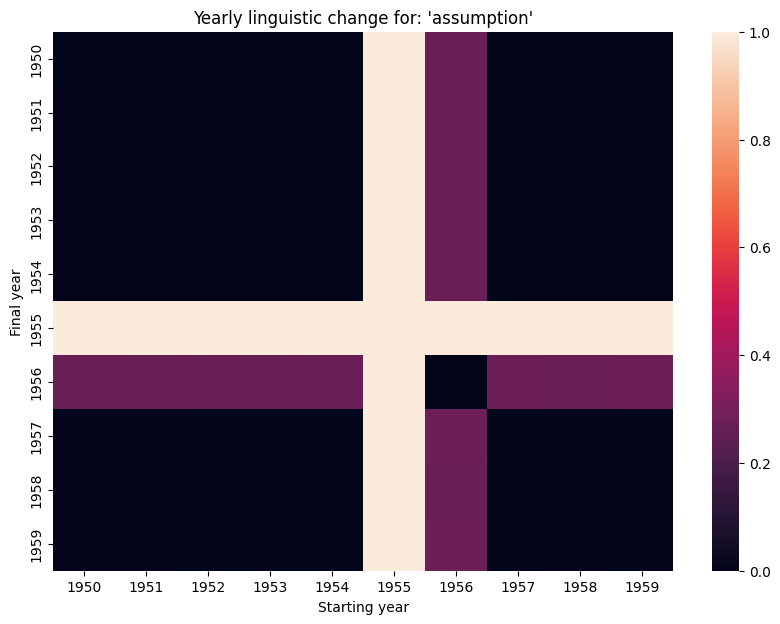

In [232]:
targetWord = 'assumption'

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

In [233]:
def findMostCommon(embeddingsDict, starting_year):
    original_words = embeddingsDict[starting_year][0].wv.index_to_key
    for embeds in embeddingsDict.values():
        for embed in embeds:
            original_words = set(original_words).intersection(set(embed.wv.index_to_key))
    words = set(original_words)
    print("Found {} words common to both starting and final year.".format(len(words)))
    return sorted([(w, findDiverence(w, embeddingsDict)) for w in words], key=lambda x: x[1], reverse=True)


work


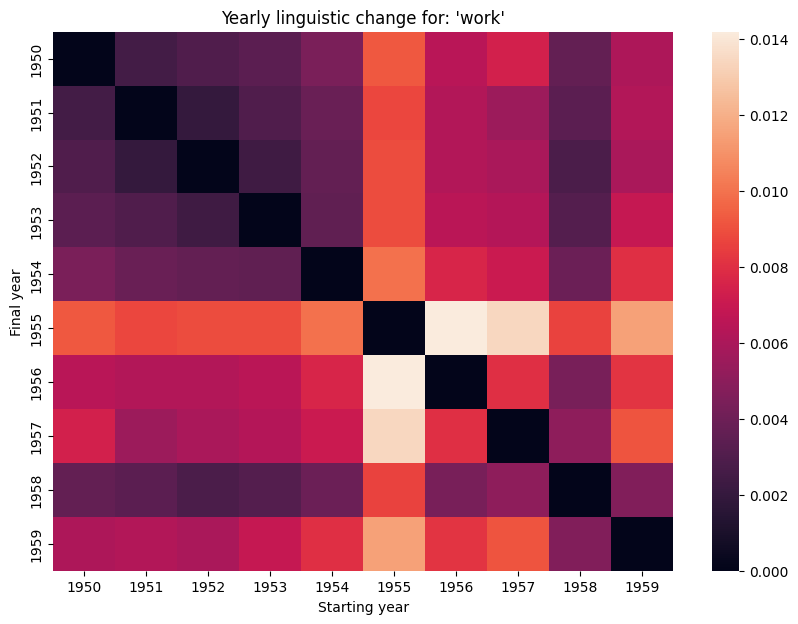

In [234]:
targetWord = 'work'

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

In [235]:
def findDiverence(word, embeddingsDict):
    cats = sorted(set(embeddingsDict.keys()))

    dists = []
    for embed in embeddingsDict[cats[0]][1:]:
        try:
            dists.append(1 - sklearn.metrics.pairwise.cosine_similarity(np.expand_dims(embeddingsDict[cats[0]][0].wv[word], axis = 0), np.expand_dims(embed.wv[word], axis = 0))[0,0])
        except:
            pass
    return np.mean(dists)

def findMostDivergent(embeddingsDict):
    original_words = comparedEmbeddings[1950][0].wv.index_to_key
    for embeds in embeddingsDict.values():
        for embed in embeds:
            original_words = set(original_words).intersection(set(embed.wv.index_to_key))
    words = set(original_words)
    print("Found {} words to compare".format(len(words)))
    return sorted([(w, findDiverence(w, embeddingsDict)) for w in words], key = lambda x: x[1], reverse=True)

In [236]:
wordDivergences = findMostDivergent(comparedEmbeddings)

Found 843 words to compare


In [238]:
wordDivergences[:40]

[('satisfactory', 0.9999998115190405),
 ('depend', 0.9999995632380564),
 ('fine', 0.999999194463042),
 ('broaden', 0.4046013524078944),
 ('pure', 0.31921164451921696),
 ('combine', 0.3105982846180666),
 ('t', 0.3100651353062062),
 ('neutral', 0.30848057316206834),
 ('j', 0.3066261268202751),
 ('hr', 0.3058274107919267),
 ('treat', 0.30579463324149003),
 ('cloud', 0.30554243181788066),
 ('transfer', 0.3047879444165858),
 ('prove', 0.3042636631662212),
 ('position', 0.30424606683043864),
 ('apparatus', 0.303991754184392),
 ('analysis', 0.30361562161997285),
 ('presence', 0.30337302392055426),
 ('path', 0.30327142102773),
 ('d', 0.3031908457598334),
 ('h', 0.30309114096240675),
 ('ferromagnetic', 0.30279169789433935),
 ('law', 0.2400464589483306),
 ('accurately', 0.22040586849821153),
 ('gauss', 0.2197880719496613),
 ('detector', 0.21541568371553693),
 ('case', 0.215254793951641),
 ('hour', 0.21385551002328107),
 ('process', 0.21383446976147907),
 ('orbit', 0.2137400105099175),
 ('paper',

In [239]:
wordDivergences[-40:]

[('heavy', 0.004681694507598877),
 ('day', 0.0046666979789733885),
 ('applicable', 0.00465354323387146),
 ('initial', 0.004644232988357544),
 ('numerical', 0.004627454280853272),
 ('work', 0.004615902900695801),
 ('produce', 0.004598063230514526),
 ('masse', 0.004595023393630981),
 ('thickness', 0.0045666277408599855),
 ('v', 0.004556792974472046),
 ('far', 0.004532277584075928),
 ('power', 0.0045052111148834225),
 ('length', 0.004505139589309692),
 ('follow', 0.004485118389129639),
 ('small', 0.004483985900878906),
 ('discuss', 0.004458391666412353),
 ('diameter', 0.004419201612472534),
 ('incident', 0.004395806789398193),
 ('liquid', 0.004373872280120849),
 ('e', 0.004343611001968384),
 ('nucleon', 0.004309135675430298),
 ('report', 0.004297274351119995),
 ('strong', 0.004271966218948364),
 ('increase', 0.00426715612411499),
 ('structure', 0.004241389036178589),
 ('differential', 0.004240614175796509),
 ('expose', 0.004237520694732666),
 ('chamber', 0.0042367219924926754),
 ('effecti

simple


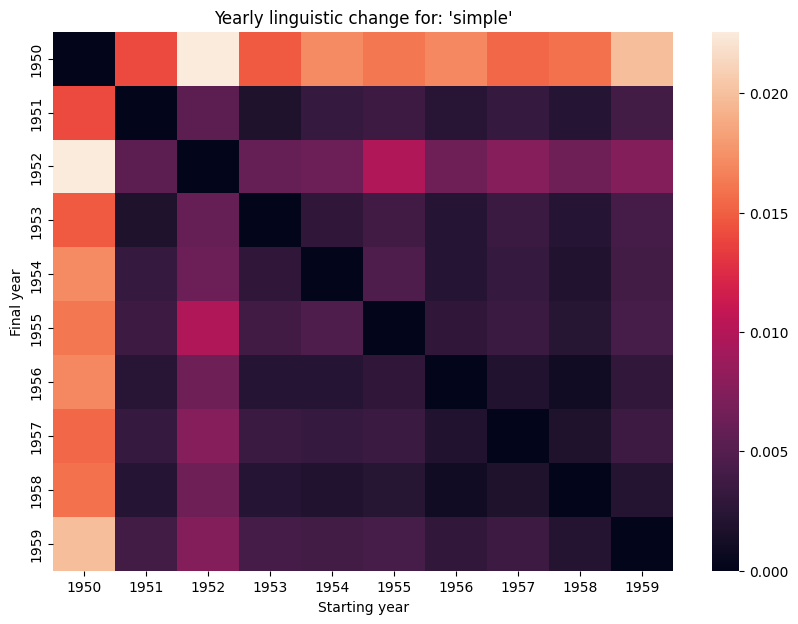

In [241]:
targetWord = wordDivergences[-300][0]

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

connect


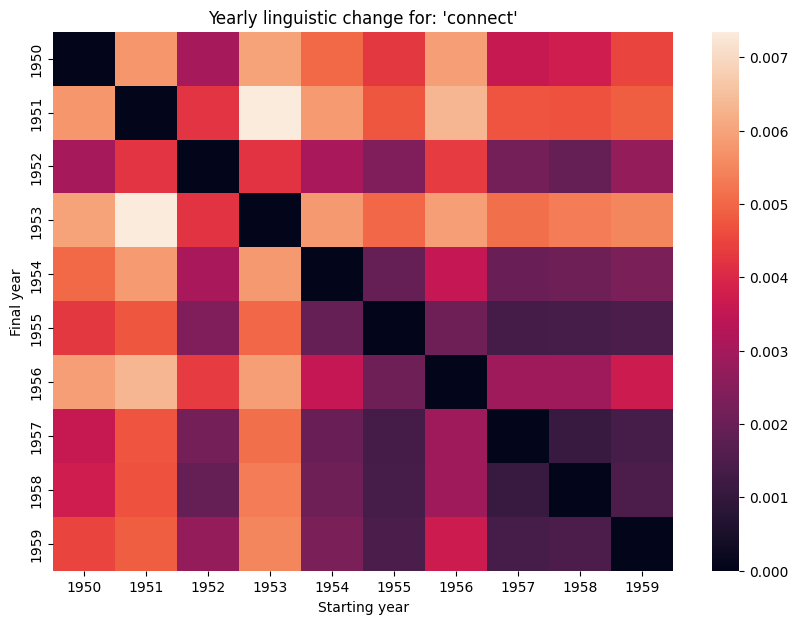

In [245]:
targetWord = wordDivergences[-10][0]

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

There is much more we do not have time to cover on word embeddings. If you are interested in other ways to align word embeddings, take a look at the [Dynamic Word Embeddings (DTM) section from the Thinking with Deep Learning course](https://colab.research.google.com/drive/1RAiI3BIL1X9D4gzZ0rZdIJjkNNicIuKE?usp=sharing#scrollTo=COS_n2RFCJNk) or using the more recent [Temporal Word Embeddings with a Compass (TWEC) package](https://github.com/valedica/twec). There is also a useful section on [debiasing word embeddings](https://colab.research.google.com/drive/1RAiI3BIL1X9D4gzZ0rZdIJjkNNicIuKE?usp=sharing#scrollTo=JHQ--EsWoxGM), such as the famous, ["Man is to Computer Programmer as Woman is to Homemaker? Debiasing Word Embeddings"](https://arxiv.org/abs/1607.06520) paper. Below, we include an optional section on topic modeling with word embeddings, which could be useful for final projects.

## Optional: Topic modeling with word embeddings

Recently computer scientists have developed methods to cluster word embeddings, which can be viewed as a topic model, an embedding-based version of conventional topic models that use the document-term matrix (e.g., LDA). One method is Discourse Atoms, first described by Princeton NLP researchers ([Arora et al. 2018](https://arxiv.org/abs/1601.03764)). This uses k-SVD, a generalization of the k-means clustering algorithm to identify topic-like vectors in the n-dimensional word embedding space. Below is code adapted from the first social science paper using Discourse Atoms, [Arseniev-Koehler et al. 2021](https://osf.io/preprints/socarxiv/nkyaq/). It takes as input _gensim_ word vectors.

You are not required to implement this, but for class projects or your own research, this can be more useful than conventional topic models. It runs faster, produces more detailed topics, and in general makes use of more information (i.e., word order within a document) than do conventional topic models. Note there are at least 4 other papers with methods for word embedding clusters:

- Xun, Li, Zhao, Gao, and Zhang 2017: [multivariate Gaussian distributions](https://www.ijcai.org/proceedings/2017/588)
- Dieng, Ruiz, and Blei 2019: ["Embedding Topic Model (ETM)"](https://arxiv.org/abs/1907.04907)
- Angelov 2020: ["Top2Vec"](https://arxiv.org/abs/2008.09470)
- Sia, Dalmia, and Mielke 2020: [(spherical) k-means, k-medoids, von Mises-Fisher Models, Gaussian Mixture Models](https://arxiv.org/abs/2004.14914)

Let's implement the Discourse Atoms method.

In [ ]:
from gensim.test.utils import datapath
import re
import string, re
import cython

In [ ]:
# The ksvd package has a convenient Approximate k-SVD function.
!pip install ksvd

In [ ]:
from gensim import corpora, models, similarities #calc all similarities at once, from http://radimrehurek.com/gensim/tut3.html
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import KeyedVectors
from random import seed, sample
from ksvd import ApproximateKSVD #pip or conda install ksvd #this is key!

In [ ]:
import pickle

In [ ]:
import math

In [ ]:
# Load a gensim word2vec model
w2v = senReleasesW2V

#### k-SVD

We then perform a K-SVD on the word embedding matrix to learn topics in such a way where each word-vector is represented as a spare linear combination of topics. To generate a good representation of the original word vector space, we want to minimize the difference between our word vectors and the vectors generated as a linear combination of topics.




In [ ]:
#### TRAIN MODEL:

#n_comp: Number of topics (i.e., atoms, or dictionary elements)
#n_nonzeros: Number of nonzero coefficients to target (how many atoms each word can load onto)

##create the saving folder if you need!!

def do_aksvd(w2vmodel, n_comp, n_nonzeros, save=False, savelocation='/content/aksvd_models/'):
    #https://github.com/nel215/ksvd #takes about 2 min on Alina's laptop for 30 atoms
    aksvd_t = ApproximateKSVD(n_components=n_comp, transform_n_nonzero_coefs=n_nonzeros) #also may adjuste n iter which is default at 10, and tolerance for error which is default at  tol=1e-6 #n_components is number of discourse atoms, since vocab size is smallish, keep this fewer. transform_n is the number of atoms (components) that a word can be a linear combo of
    dictionary_t = aksvd_t.fit(w2vmodel.wv.vectors).components_ # Dictionary is the matrix of discourse atoms.
    alpha_t = aksvd_t.transform(w2vmodel.wv.vectors) #get the alphas, which are the "weights" of each word on a discourse atoms

    if save==True:
        outfile = open(str(savelocation) + '200d_' + str(n_comp) + 'comp' + str(n_nonzeros) + 'nonzeros_aksvd_nvdrsdf20','wb')
        pickle.dump(aksvd_t,outfile)
        outfile.close()

        outfile = open(str(savelocation) + '200d_' +str(n_comp) + 'comp' + str(n_nonzeros) + 'nonzeros_dictionary_nvdrsdf20','wb')
        pickle.dump(dictionary_t,outfile)
        outfile.close()

        outfile = open(str(savelocation) + '200d_' + str(n_comp) + 'comp' + str(n_nonzeros) + 'nonzeros_alpha_nvdrsdf20','wb')
        pickle.dump(alpha_t,outfile)
        outfile.close()
    return(dictionary_t, alpha_t)

Two quick quality checks. These are useful to choose the number of atoms in the dictionary (i.e., number of topics): $R^2$ and Topic Diversity

Useful to look at product of the two since $R^2$ tends to increase with higher # topics, as Topic Diversity decreases. Intuition: more topics can better explain the original semantic space, but also then these topics are less distinct from one another. As a result, we typically want a balance between the two.

In [ ]:
def reconst_qual(w2vmodel, dictionary_mat, alpha_mat):
    #reconstruct the word vectors
    reconstructed = alpha_mat.dot(dictionary_mat) #reconstruct word vectors and add back in mean(?). but note that reconstructed norm is still around 0-1, not 1, is that an issue?
    #e1 = norm(w2vmodel.wv.vectors - reconstructed) #total reconstruction error, larger means MORE error. norm as specified here takes frobenius norm of error matrix.


    #total VARIANCE in the data: sum of squares
    squares3= w2vmodel.wv.vectors-np.mean(w2vmodel.wv.vectors, axis=1).reshape(-1,1) #https://dziganto.github.io/data%20science/linear%20regression/machine%20learning/python/Linear-Regression-101-Metrics/
    #sst3= np.sum([i.dot(i) for i in squares3] ) #same as below

    sst3= np.sum(np.square(squares3))


    #total sum of squared ERRORS/residuals
    e3= [reconstructed[i]-w2vmodel.wv.vectors[i] for i in range(0,len(w2vmodel.wv.vectors))]  #https://dziganto.github.io/data%20science/linear%20regression/machine%20learning/python/Linear-Regression-101-Metrics/
    #sse3= np.sum([i.dot(i) for i in e3] ) #same as below
    sse3= np.sum(np.square(e3))

    #R^2: 1- (SSE / SST )
    r2= 1- (sse3 /  sst3) #https://stats.stackexchange.com/questions/184603/in-pca-what-is-the-connection-between-explained-variance-and-squared-error


    #compute root mean square error
    rmse=  math.sqrt(np.mean(np.square(e3)))



    return(sse3, rmse, r2) #https://stats.stackexchange.com/questions/184603/in-pca-what-is-the-connection-between-explained-variance-and-squared-error

#### Inferring topics from document

We now use a similar approach to what we saw a little earlier, where we inverted our generative model to see which documents belong to which class - we do the same now, but with discourse atoms instead of the whole model. This process tells us the topic most likely to have generated a specific context (document).



In [ ]:
#topic diversity (% unique words among total closest 25 words to each atom)
def topic_diversity(w2vmodel, dictionary_mat, top_n=25):

    topwords=[] #list of list, each innter list includes top N words in that topic

    for i in range(0, len(dictionary_mat)): #set to number of total topics
        topwords.extend([i[0] for i in w2vmodel.wv.similar_by_vector(dictionary_mat[i],topn=top_n)]) #set for top N words
        #print(w2vmodel.wv.similar_by_vector(dictionary[i],topn=N))

    uniquewords= set(topwords)
    diversity = len(uniquewords)/len(topwords)
    return(diversity)

In [ ]:
##make sure to create a saving path first

dictionary, alpha = do_aksvd(w2v, 150, 5, save=True)

In [ ]:
topic_diversity(w2v, dictionary, top_n=25)

0.8034666666666667

In [ ]:
reconst_qual(w2v, dictionary, alpha)


(16714.18224838863, 0.11030937541961874, 0.868297053345052)

In [ ]:
#loading back in the model pieces if not already in

# infile = open('../data/aksvd_models/200d_150comp5nonzeros_dictionary_nvdrsdf20','rb')
# dictionary=pickle.load(infile)
# infile.close()

# infile = open('../data/aksvd_models/200d_150comp5nonzeros_aksvd_nvdrsdf20','rb')
# aksvd=pickle.load(infile)
# infile.close()

# infile = open('../data/aksvd_models/200d_150comp5nonzeros_alpha_nvdrsdf20','rb')
# alpha=pickle.load(infile)
# infile.close()

In [ ]:
for i in range(0, len(dictionary)):
    print("Discourse_Atom " + str(i))
    print([i[0] for i in w2v.wv.similar_by_vector(dictionary[i],topn=25)]) #what are the most similar words to the Nth
    #print([i[0] for i in w2vmodel.wv.similar_by_vector(-dictionary[i],topn=25)]) #what are the most similar words to the Nth dicourse atom?
    print('\n')


Discourse_Atom 0
['ends', 'desperately', 'daunting', 'faces', 'obviously', 'facing', 'desperate', 'challenge', 'needs', 'face', 'struggling', 'faced', 'heal', 'tackle', 'urgent', 'struggle', 'challenges', 'dire', 'worse', 'unmet', 'crisis', 'safer', 'confront', 'solve', 'focus']


Discourse_Atom 1
['forget', 'hopes', 'feel', 'talk', 'stood', 'forever', 'minds', 'moment', 'mind', 'afraid', 'happened', 'remember', 'alive', 'tall', 'lot', 'got', 'pledge', 'knew', 'patriotism', 'forgotten', 'truth', 'things', 'reminded', 'fathers', 'hearts']


Discourse_Atom 2
['house', 'supremacist', 'collar', 'party', 'democrats', 'republican', 'congress', 'independents', 'houses', 'summaries', 'democratic', 'partisan', 'ryan', 'opponent', 'disappear', 'compromise', 'slogan', 'culmination', 'opposition', 'black', 'republicans', 'skip', 'cynical', 'mckeon', 'negotiators']


Discourse_Atom 3
['essential', 'tools', 'maintain', 'strengthen', 'effectively', 'necessary', 'adequate', 'enable', 'securing', 'tool

In [ ]:
# for a specific atom, e.g., 112th atom look at 25 most similar words:
w2v.wv.similar_by_vector(dictionary[112],topn=25)

[('funds', 0.7516657114028931),
 ('funding', 0.6887559294700623),
 ('resources', 0.6219789385795593),
 ('assistance', 0.6081899404525757),
 ('efforts', 0.575427770614624),
 ('reimbursements', 0.5240765810012817),
 ('effort', 0.5111767053604126),
 ('communities', 0.5077028274536133),
 ('desperately', 0.5070760250091553),
 ('responders', 0.5020491480827332),
 ('match', 0.49038416147232056),
 ('deliver', 0.4859146773815155),
 ('grants', 0.4784278869628906),
 ('declaration', 0.47553300857543945),
 ('commonsense', 0.47147828340530396),
 ('governments', 0.4701017439365387),
 ('support', 0.4608587920665741),
 ('programs', 0.4598115384578705),
 ('rebuild', 0.4564478099346161),
 ('flexibility', 0.4534948468208313),
 ('initiative', 0.4531988799571991),
 ('gear', 0.45291605591773987),
 ('firefighting', 0.45242419838905334),
 ('agencies', 0.45125699043273926),
 ('evacuees', 0.4423292577266693)]

In [ ]:
#useful relevant code:
w2v.wv.index_to_key[3452]

'balances'

In [ ]:
w2v.wv.most_similar('divorced', topn=15)

[('pregnant', 0.8717613816261292),
 ('married', 0.8586174845695496),
 ('disproportionately', 0.8537034392356873),
 ('color', 0.839481770992279),
 ('minorities', 0.8368760347366333),
 ('sore', 0.8331732153892517),
 ('couples', 0.8202372193336487),
 ('babies', 0.8103613257408142),
 ('ages', 0.7914664149284363),
 ('shouldered', 0.788785994052887),
 ('everyday', 0.7813878655433655),
 ('aged', 0.7813552021980286),
 ('caregivers', 0.7750584483146667),
 ('spouse', 0.770943820476532),
 ('bankrupt', 0.7709380984306335)]

In [ ]:
np.where(alpha[w2v.wv.key_to_index['divorced']] != 0) #get index where the loading of a word onto discourse atoms is not 0

(array([ 22,  37, 105, 110, 134]),)